# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("Android_Permission.csv")
data

App  \
0             Canada Post Corporation   
1                           Word Farm   
2                Fortunes of War FREE   
3      Better Keyboard: Avatar Purple   
4                          Boxing Day   
...                               ...   
29994                 Beechwood Hotel   
29995         ZDefense: Tower Defense   
29996          Super Task Killer FREE   
29997         Ambassador Hotel Taipei   
29998                 Brain Ball Game   

                                        Package          Category  \
0                        com.canadapost.android          Business   
1                     com.realcasualgames.words    Brain & Puzzle   
2                            fortunesofwar.free    Cards & Casino   
3      com.cc.betterkeyboard.skins.avatarpurple  Libraries & Demo   
4                    indiaNIC.android.BoxingDay         Lifestyle   
...                                         ...               ...   
29994                       smartstay.beechwood    Travel & Local   
29995                     mobi.zstudio.avi.full   Arcade & Action   
29996                      com.netqin.aotkiller             Tools   
29997                       VMC.Ambassadorhotel    Travel & Local   
29998              myapp.lecz.android.tiltmazes    Brain & Puzzle   

                                             Description  Rating  \
0      Canada Post Mobile App gives you access to som...     3.1   
1      Speed and strategy combine in this exciting wo...     4.3   
2      Fortunes of War is a fast-paced, easy to learn...     4.1   
3      Skin for Better Keyboard featuring a glossy fe...     3.6   
4      Boxing Day by Christopher Jaymes<p>Based on a ...     0.0   
...                                                  ...     ...   
29994  Beechwood is an Android hotel app for guests, ...     5.0   
29995  Explosive Tower Defense!<p>Top Tower Defense G...     4.6   
29996  Get it for FREE. Quickly Kill running apps. Fr...     4.2   
29997  Key features of this App: <br>1. View photos o...     3.4   
29998  A ball sits in a flat tray containing one or m...     3.0   

       Number of ratings  Price  \
0                     77   0.00   
1                    199   0.00   
2                    243   0.00   
3                   2589   0.00   
4                      0   5.99   
...                  ...    ...   
29994                  2   0.00   
29995                 56   2.99   
29996               6101   0.00   
29997                  5   0.00   
29998                  2   0.00   

                                            Related apps  \
0      {com.adaffix.pub.ca.android, com.kevinquan.gas...   
1      {air.com.zubawing.FastWordLite, com.joybits.do...   
2      {com.kevinquan.condado, hu.monsta.pazaak, net....   
3      {eu.gdumoulin.betterandroid.skins.transparent....   
4                                                    NaN   
...                                                  ...   
29994  {com.bluewaterpages, com.travelconnection.luxu...   
29995  {com.entwicklerx.swampdefense, com.digimentgam...   
29996  {com.guardam.TaskKiller, com.netqin.authtoken_...   
29997  {com.hyxen.app.NewTaipeiTravel, j2ab.android.t...   
29998  {com.twistedmirror.alberiplus, com.freesoul.Mo...   

       Dangerous permissions count  Safe permissions count  ...  \
0                              7.0                       1  ...   
1                              3.0                       2  ...   
2                              1.0                       1  ...   
3                              0.0                       0  ...   
4                              1.0                       0  ...   
...                            ...                     ...  ...   
29994                          3.0                       1  ...   
29995                          3.0                       3  ...   
29996                          4.0                       3  ...   
29997                          3.0                       0  ...   
29998           

In [3]:
data.shape

(29999, 184)

In [4]:
data.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [5]:
data.describe()

Rating  Number of ratings         Price  \
count  29999.000000       2.999900e+04  29999.000000   
mean       3.537215       6.852608e+03      0.625707   
std        1.424685       4.586899e+04      3.222620   
min        0.000000       0.000000e+00      0.000000   
25%        3.300000       4.000000e+00      0.000000   
50%        4.000000       4.600000e+01      0.000000   
75%        4.400000       7.160000e+02      0.000000   
max        5.000000       1.908590e+06    158.070000   

       Dangerous permissions count  Safe permissions count  \
count                 29795.000000            29999.000000   
mean                      3.111160                1.353978   
std                       3.052602                1.523491   
min                       0.000000                0.000000   
25%                       1.000000                0.000000   
50%                       2.000000                1.000000   
75%                       4.000000                2.000000   
max                      30.000000               16.000000   

       Default : Access DRM content. (S)  \
count                       29999.000000   
mean                            0.000300   
std                             0.017318   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       Default : Access Email provider data (S)  \
count                              29999.000000   
mean                                   0.000700   
std                                    0.026449   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       Default : Access all system downloads (S)  \
count                                    29999.0   
mean                                         0.0   
std                                          0.0   
min                                          0.0   
25%                                          0.0   
50%                                          0.0   
75%                                          0.0   
max                                          0.0   

       Default : Access download manager. (S)  \
count                            29999.000000   
mean                                 0.000400   
std                                  0.019997   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Default : Advanced download manager functions. (S)  ...  \
count                                       29999.000000   ...   
mean                                            0.000033   ...   
std                                             0.005774   ...   
min                                             0.000000   ...   
25%                                             0.000000   ...   
50%                                             0.000000   ...   
75%                                             0.000000   ...   
max                                             1.000000   ...   

       Your personal information : read calendar events (D)  \
count                                       29999.000000      
mean                                            0.014667      
std                                             0.120219      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                             1.000000      

       Your person

In [6]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [7]:
def replace_mean(x):
    if x.dtype!='object':
        return x.fillna(x.mean())
    return x

In [8]:
data1 = data.apply(lambda x: replace_mean(x),axis=1)
data1

App  \
0             Canada Post Corporation   
1                           Word Farm   
2                Fortunes of War FREE   
3      Better Keyboard: Avatar Purple   
4                          Boxing Day   
...                               ...   
29994                 Beechwood Hotel   
29995         ZDefense: Tower Defense   
29996          Super Task Killer FREE   
29997         Ambassador Hotel Taipei   
29998                 Brain Ball Game   

                                        Package          Category  \
0                        com.canadapost.android          Business   
1                     com.realcasualgames.words    Brain & Puzzle   
2                            fortunesofwar.free    Cards & Casino   
3      com.cc.betterkeyboard.skins.avatarpurple  Libraries & Demo   
4                    indiaNIC.android.BoxingDay         Lifestyle   
...                                         ...               ...   
29994                       smartstay.beechwood    Travel & Local   
29995                     mobi.zstudio.avi.full   Arcade & Action   
29996                      com.netqin.aotkiller             Tools   
29997                       VMC.Ambassadorhotel    Travel & Local   
29998              myapp.lecz.android.tiltmazes    Brain & Puzzle   

                                             Description  Rating  \
0      Canada Post Mobile App gives you access to som...     3.1   
1      Speed and strategy combine in this exciting wo...     4.3   
2      Fortunes of War is a fast-paced, easy to learn...     4.1   
3      Skin for Better Keyboard featuring a glossy fe...     3.6   
4      Boxing Day by Christopher Jaymes<p>Based on a ...     0.0   
...                                                  ...     ...   
29994  Beechwood is an Android hotel app for guests, ...     5.0   
29995  Explosive Tower Defense!<p>Top Tower Defense G...     4.6   
29996  Get it for FREE. Quickly Kill running apps. Fr...     4.2   
29997  Key features of this App: <br>1. View photos o...     3.4   
29998  A ball sits in a flat tray containing one or m...     3.0   

       Number of ratings  Price  \
0                     77   0.00   
1                    199   0.00   
2                    243   0.00   
3                   2589   0.00   
4                      0   5.99   
...                  ...    ...   
29994                  2   0.00   
29995                 56   2.99   
29996               6101   0.00   
29997                  5   0.00   
29998                  2   0.00   

                                            Related apps  \
0      {com.adaffix.pub.ca.android, com.kevinquan.gas...   
1      {air.com.zubawing.FastWordLite, com.joybits.do...   
2      {com.kevinquan.condado, hu.monsta.pazaak, net....   
3      {eu.gdumoulin.betterandroid.skins.transparent....   
4                                                    NaN   
...                                                  ...   
29994  {com.bluewaterpages, com.travelconnection.luxu...   
29995  {com.entwicklerx.swampdefense, com.digimentgam...   
29996  {com.guardam.TaskKiller, com.netqin.authtoken_...   
29997  {com.hyxen.app.NewTaipeiTravel, j2ab.android.t...   
29998  {com.twistedmirror.alberiplus, com.freesoul.Mo...   

       Dangerous permissions count  Safe permissions count  ...  \
0                              7.0                       1  ...   
1                              3.0                       2  ...   
2                              1.0                       1  ...   
3                              0.0                       0  ...   
4                              1.0                       0  ...   
...                            ...                     ...  ...   
29994                          3.0                       1  ...   
29995                          3.0                       3  ...   
29996                          4.0                       3  ...   
29997                          3.0                       0  ...   
29998           

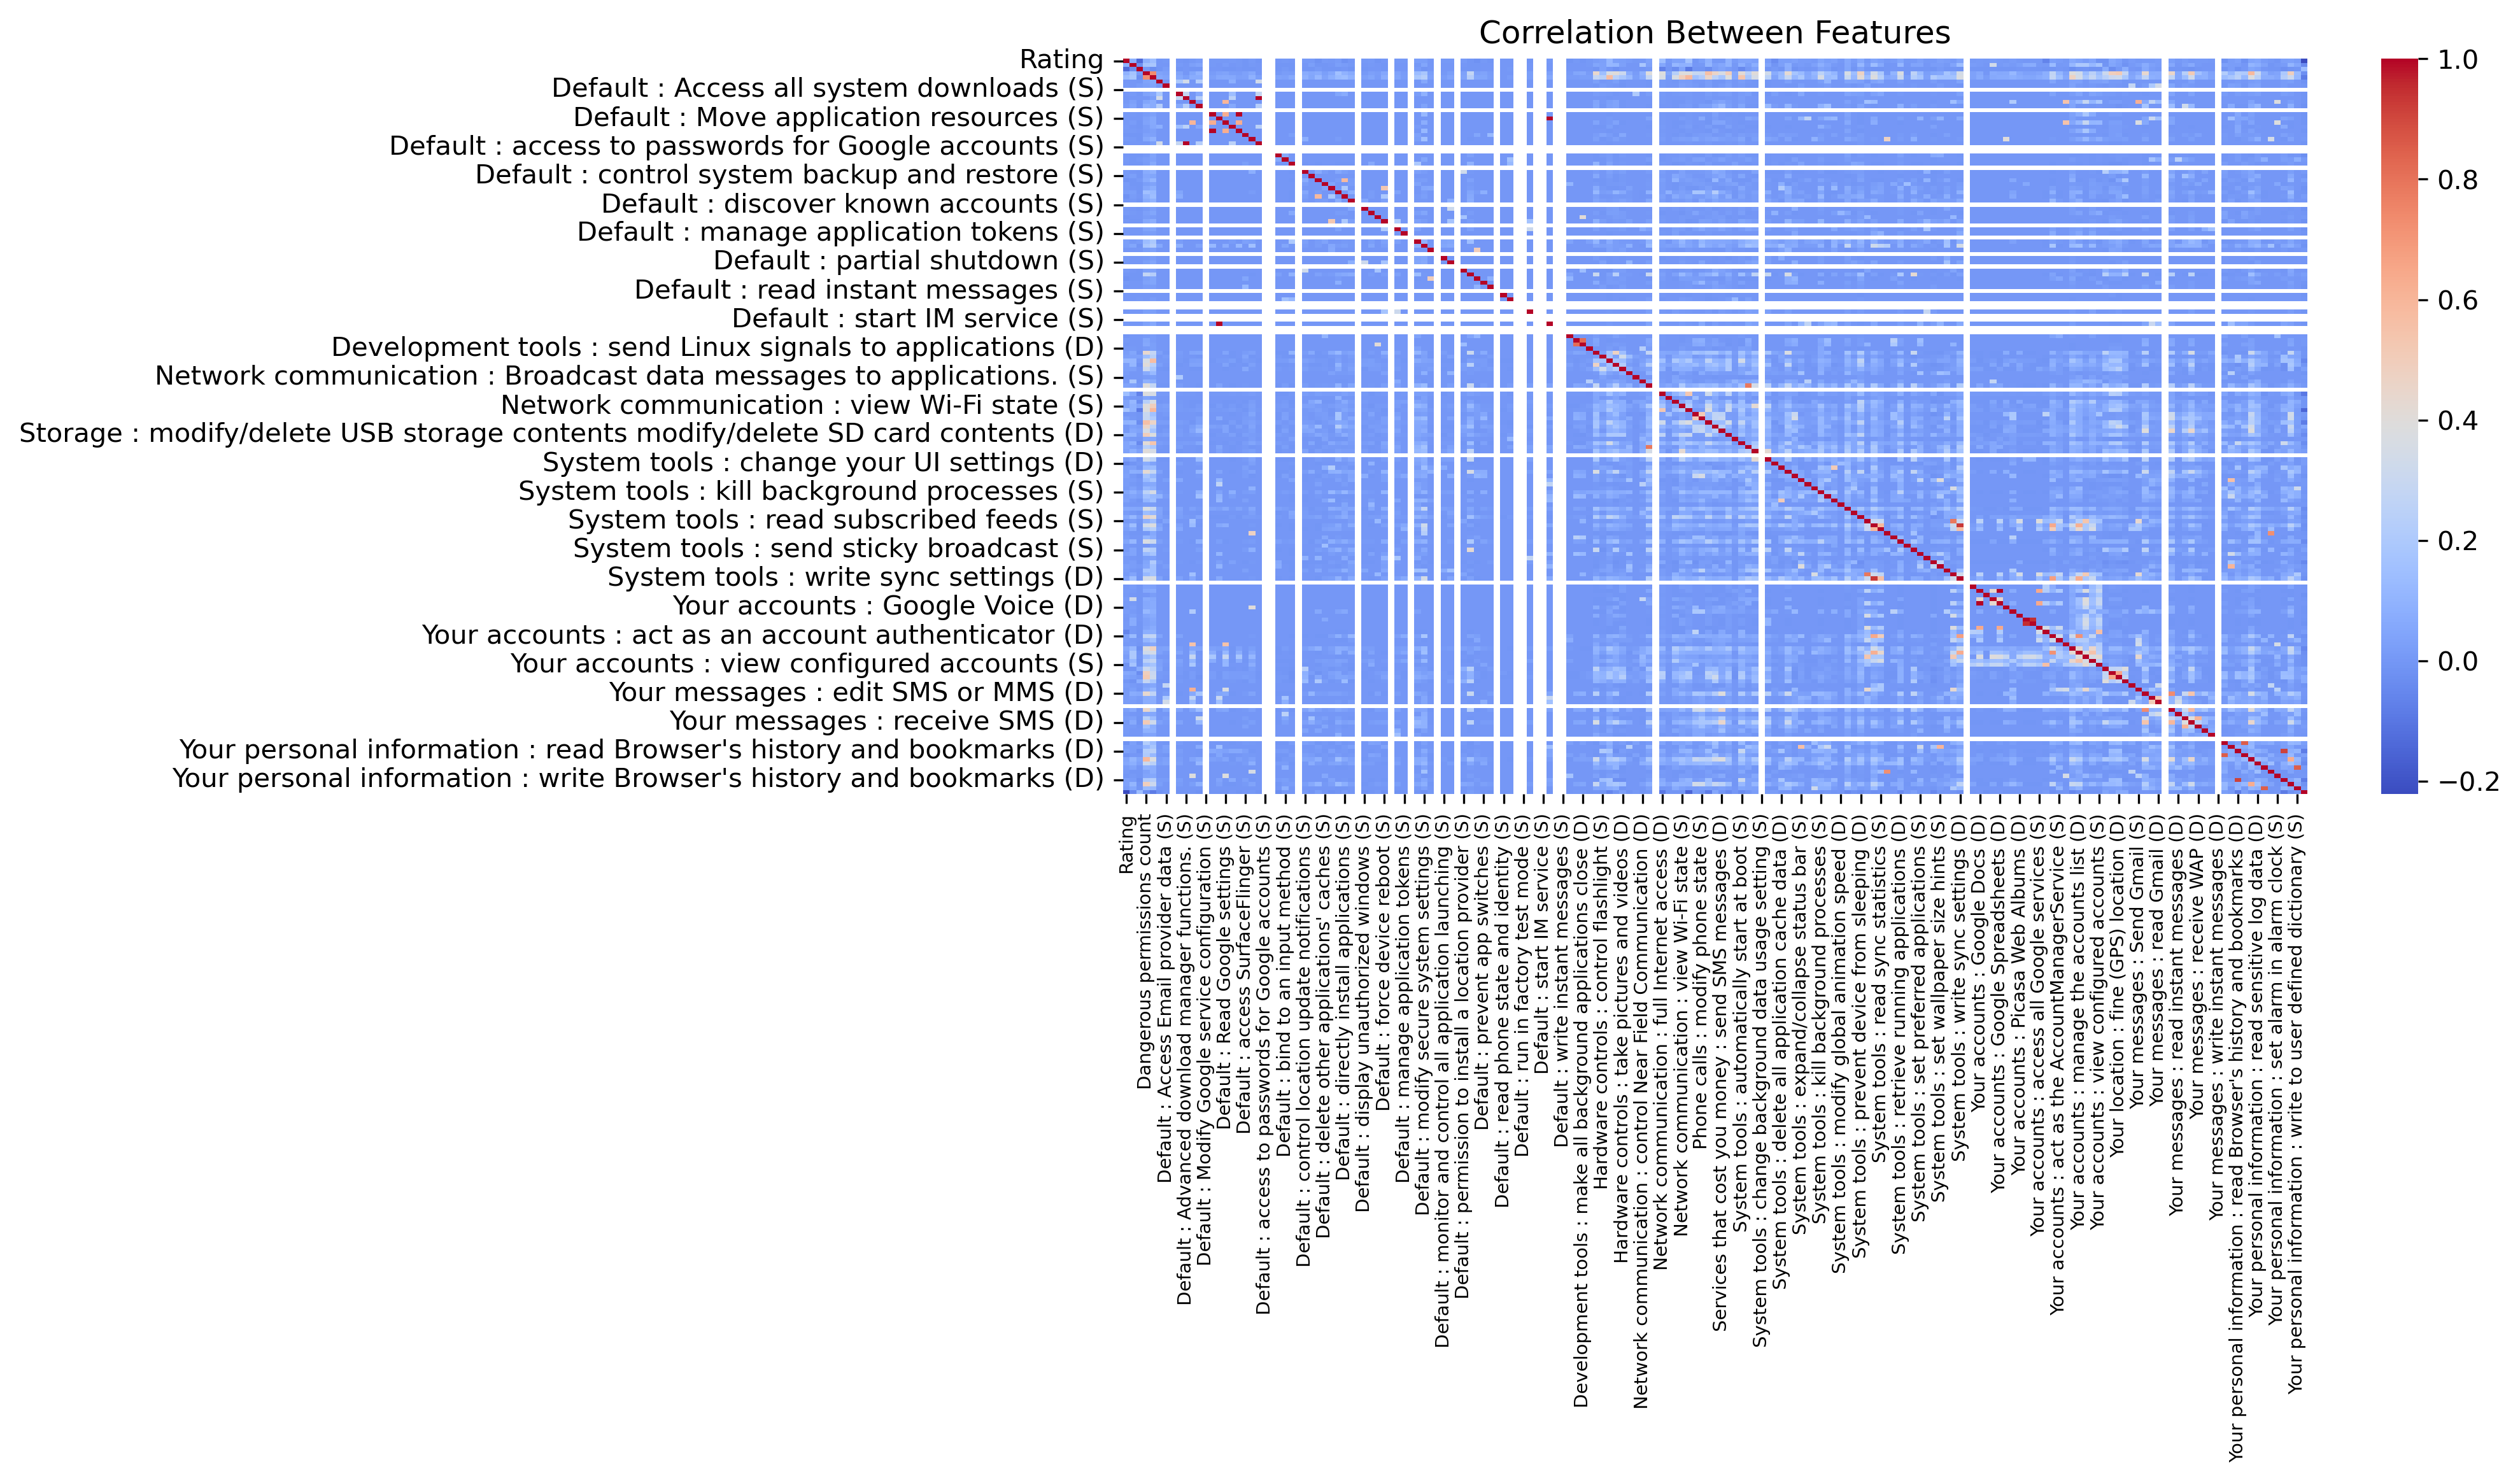

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
data = data.select_dtypes(include=['float64', 'int64'])

# Check the correlation between the features
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

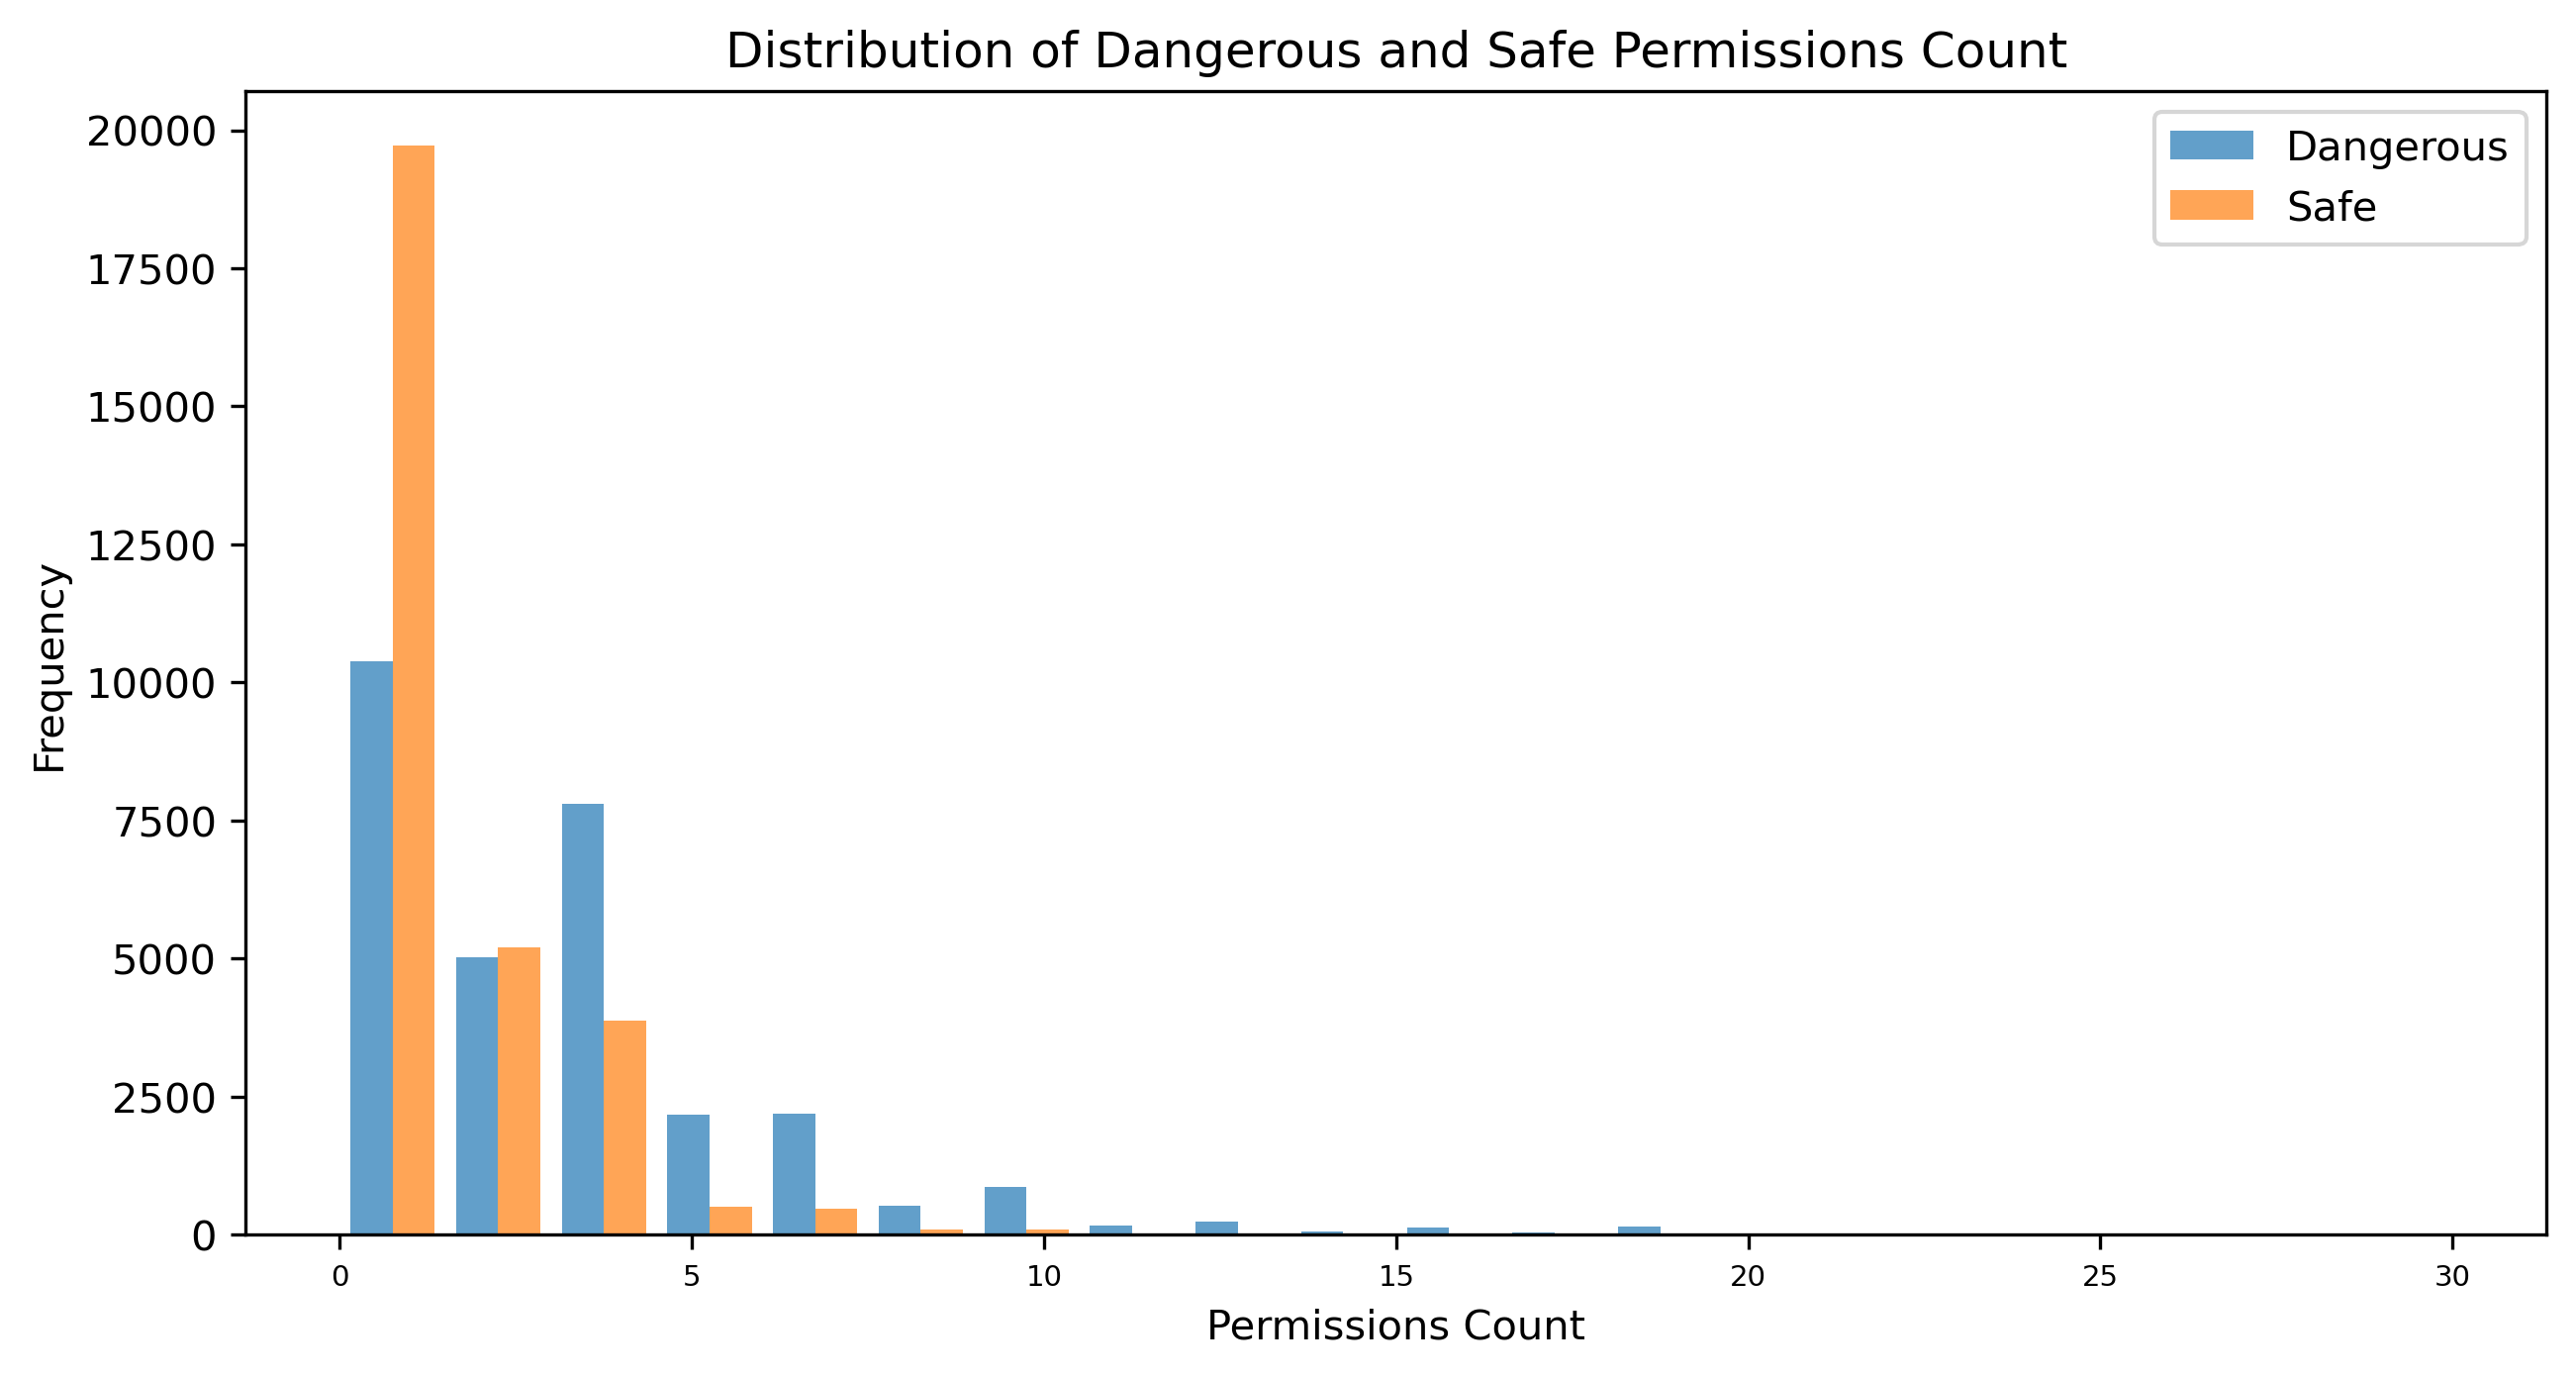

In [10]:
import matplotlib.pyplot as plt

dangerous_permissions = data['Dangerous permissions count']
safe_permissions = data['Safe permissions count']

plt.hist([dangerous_permissions, safe_permissions], label=['Dangerous', 'Safe'], bins=20, alpha=0.7)
plt.title('Distribution of Dangerous and Safe Permissions Count')
plt.xlabel('Permissions Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

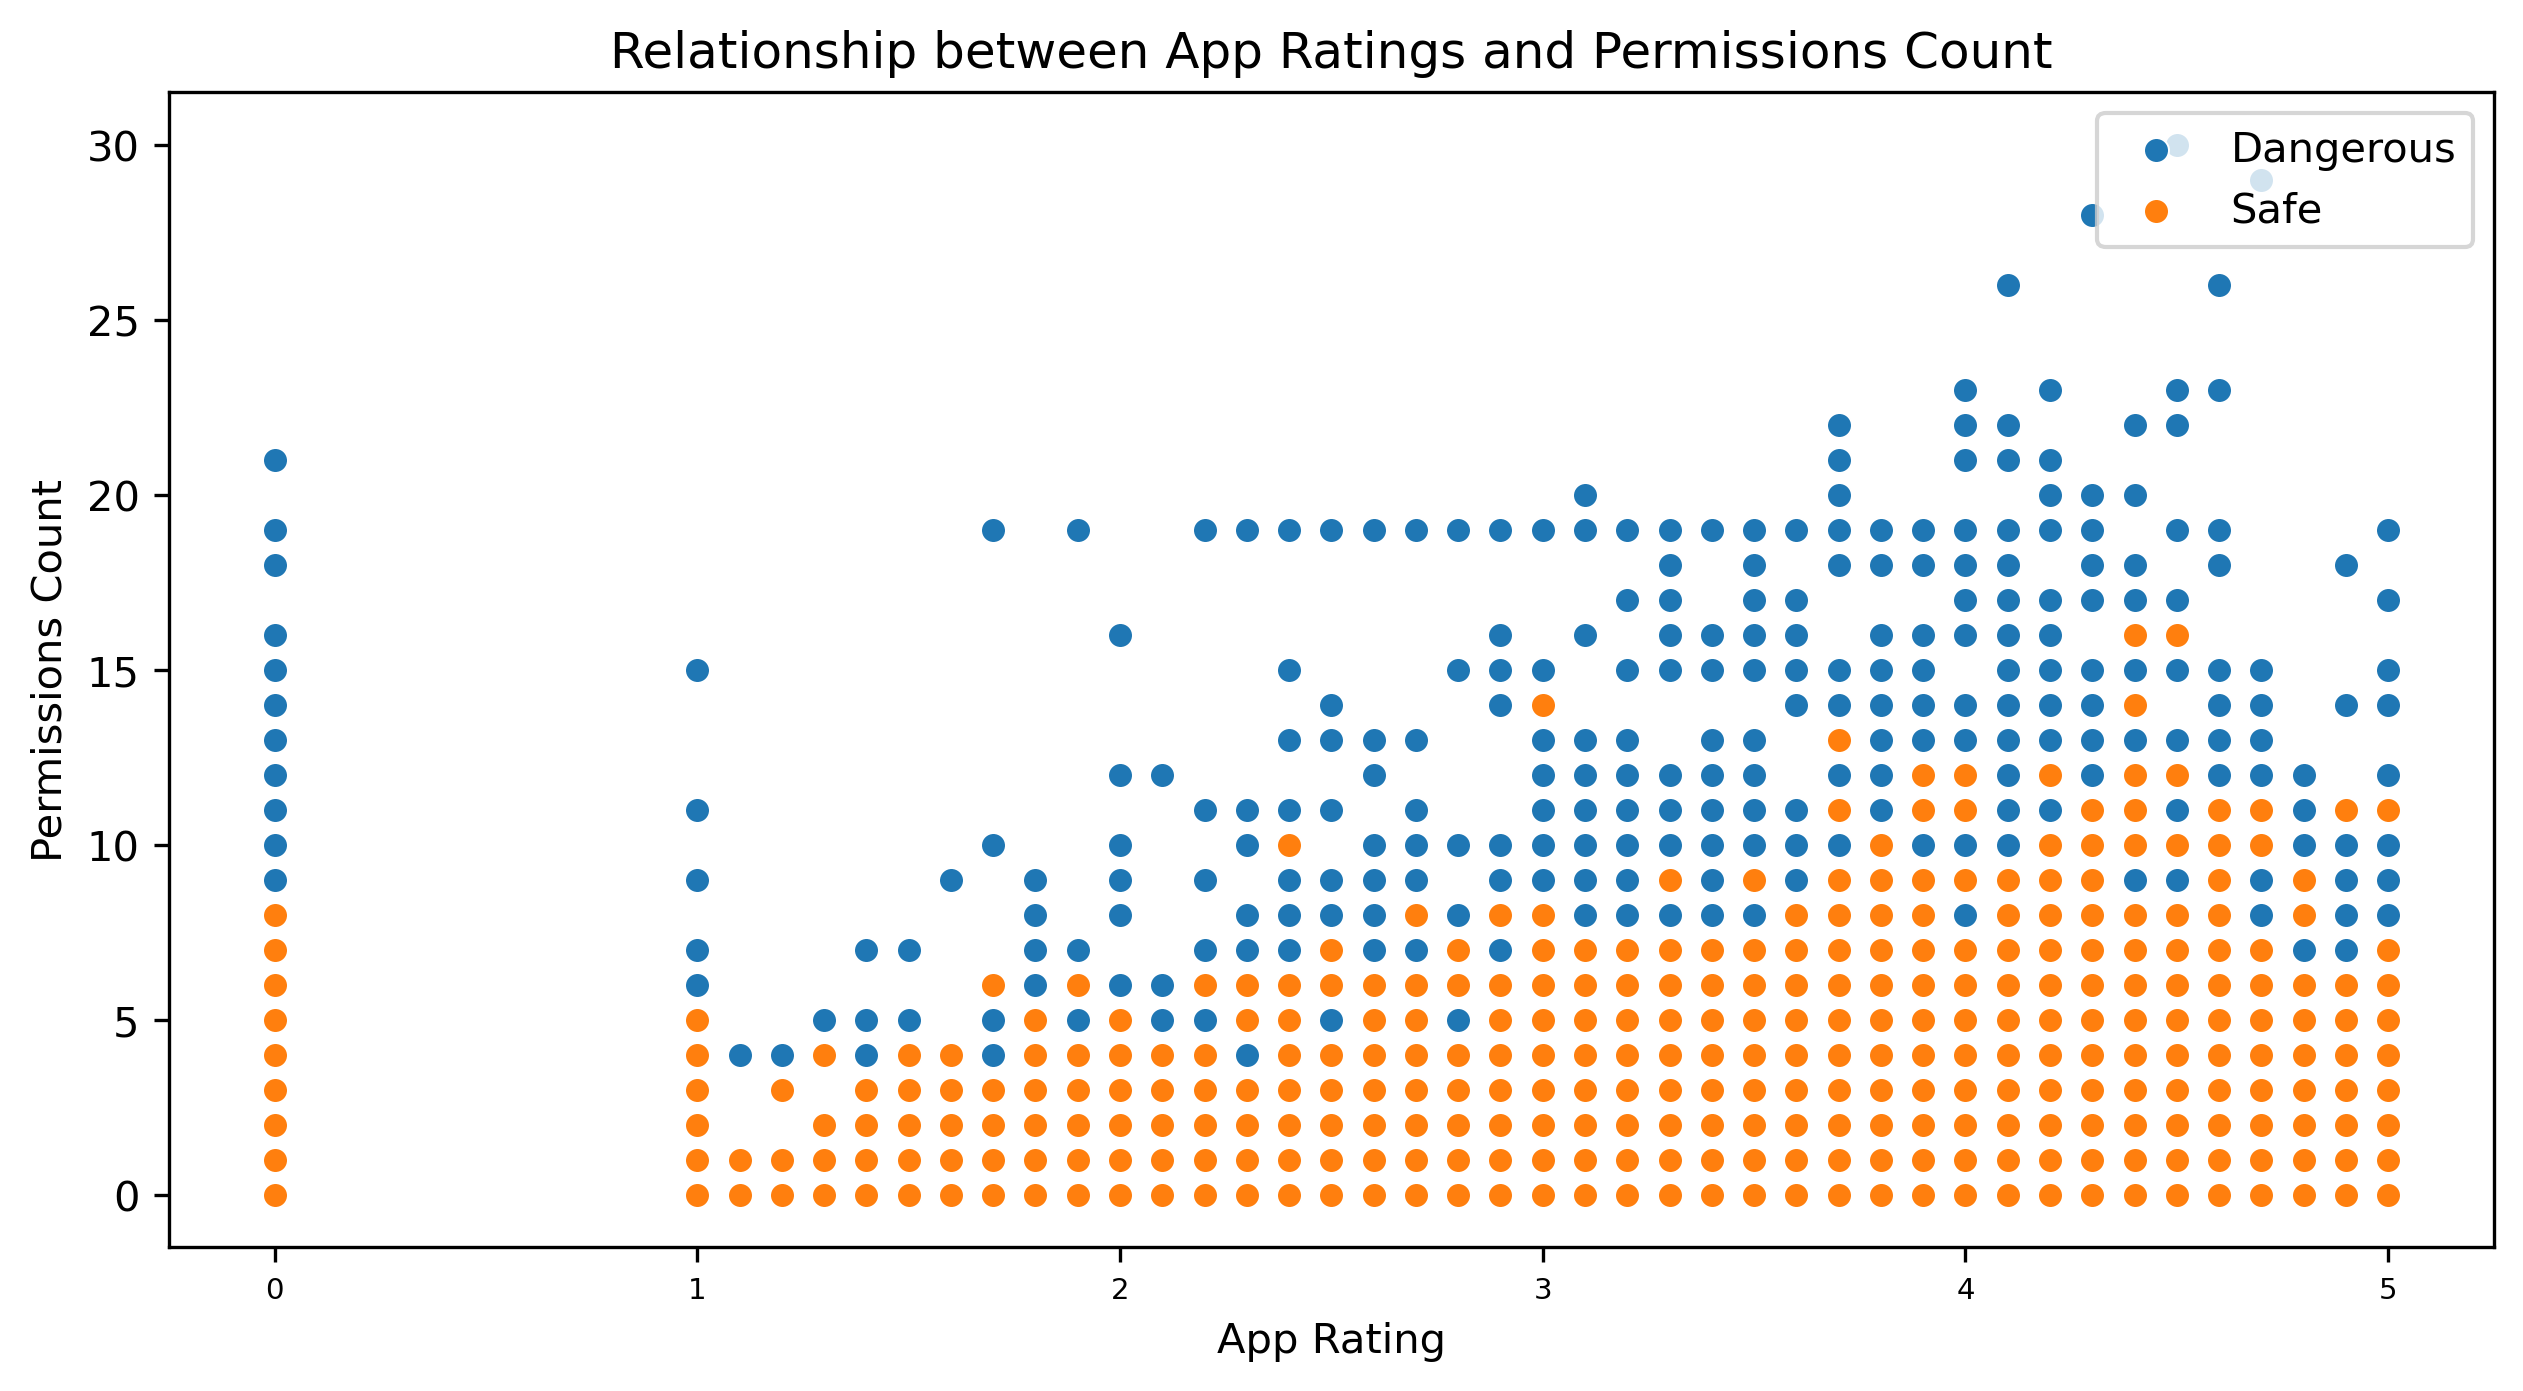

In [11]:
# Analyze the relationship between app ratings and permissions count:

import seaborn as sns

sns.scatterplot(x=data['Rating'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Rating'], y=data['Safe permissions count'], label='Safe')
plt.title('Relationship between App Ratings and Permissions Count')
plt.xlabel('App Rating')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()

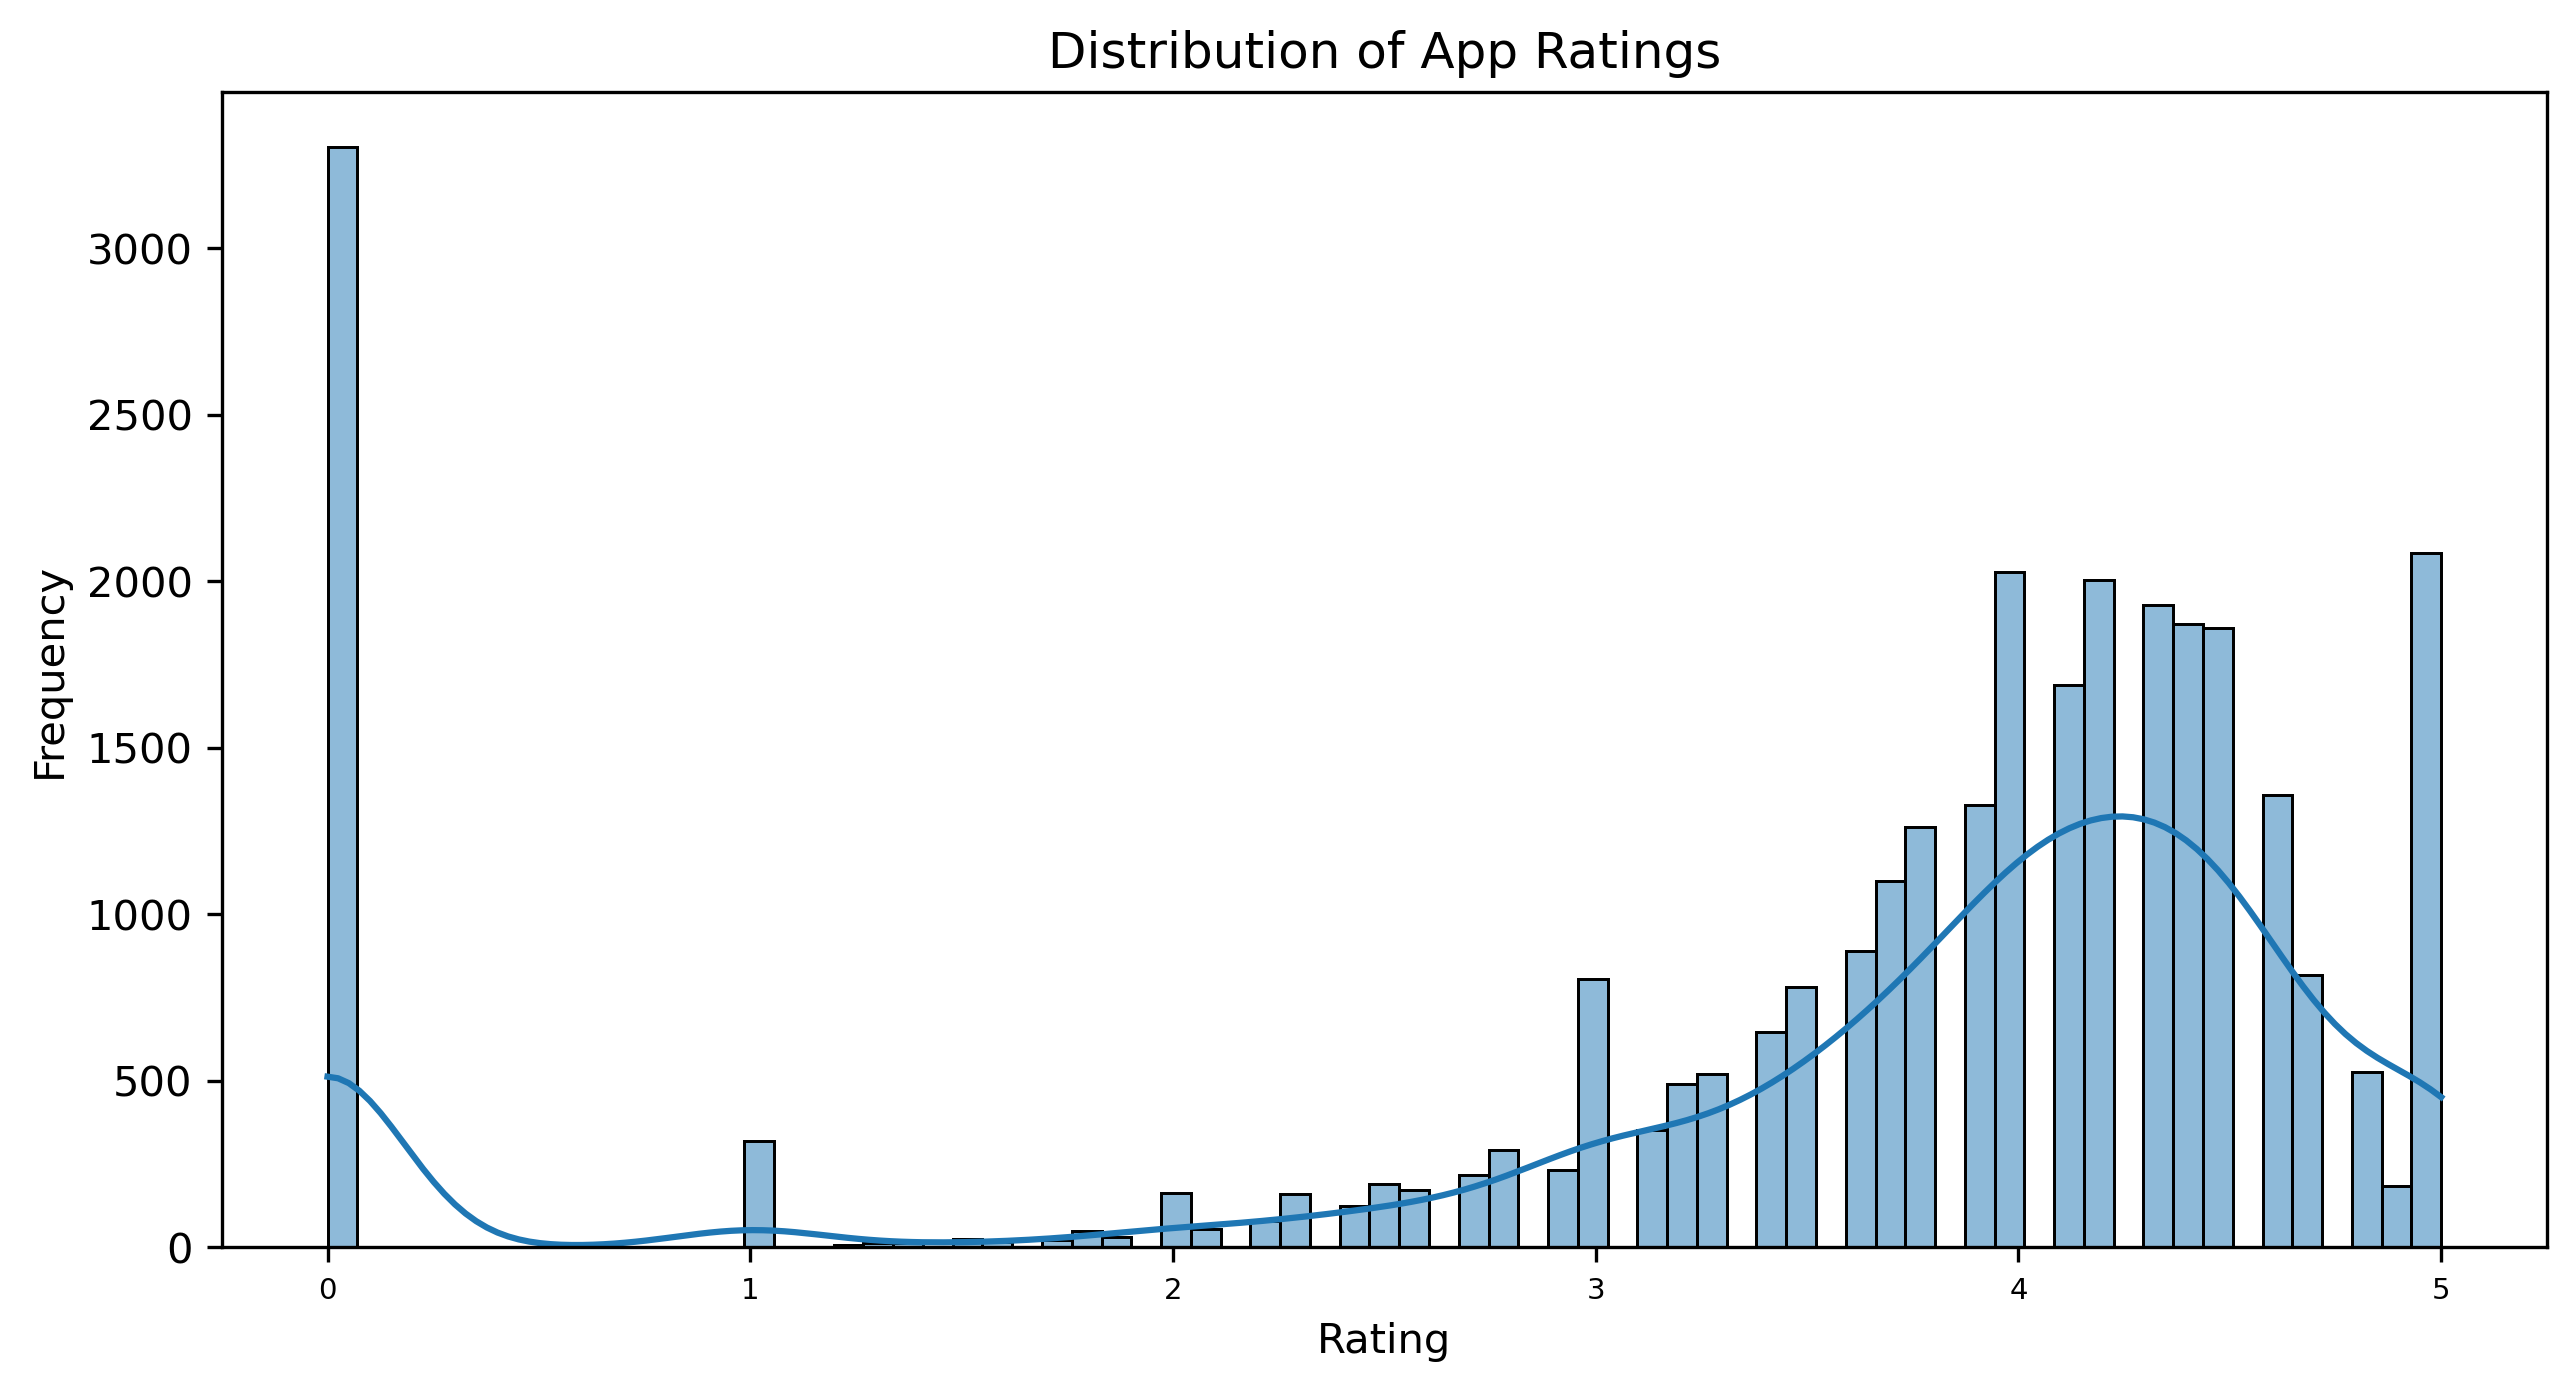

In [12]:
# Analyze the distribution of app ratings:

sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

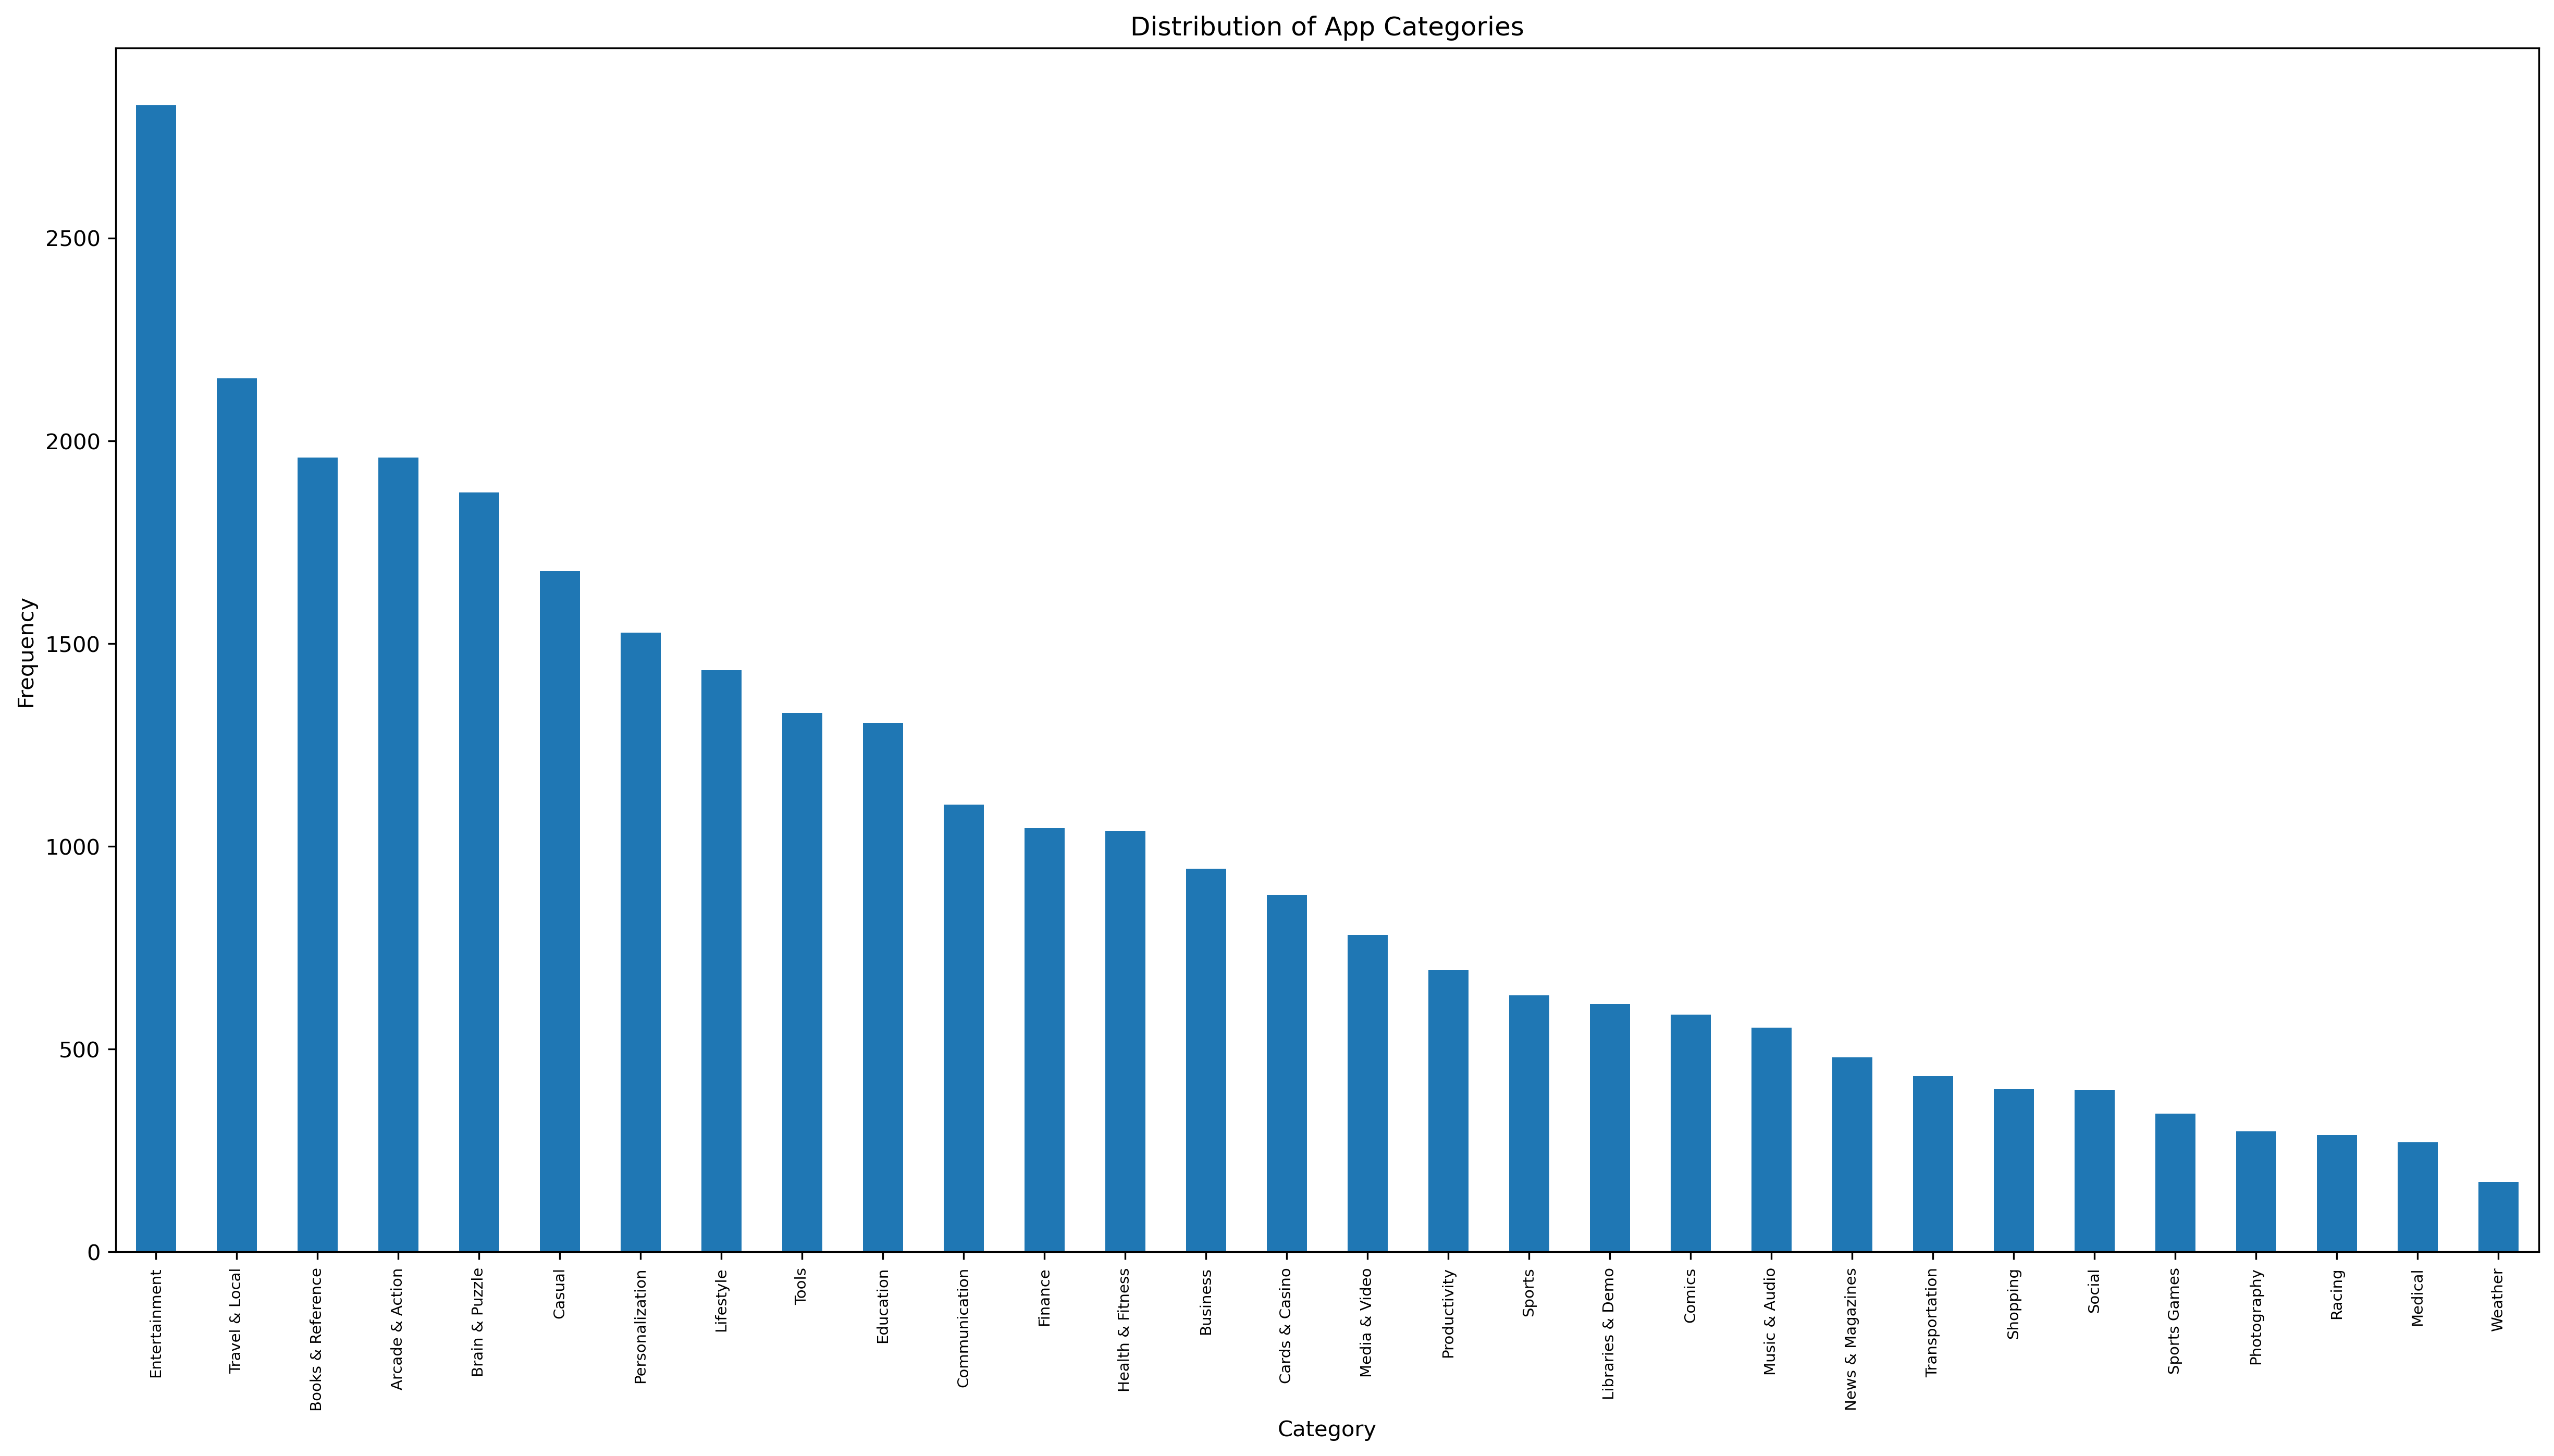

In [13]:
# Analyze the distribution of app categories:

category_counts = data1['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(20, 10))
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

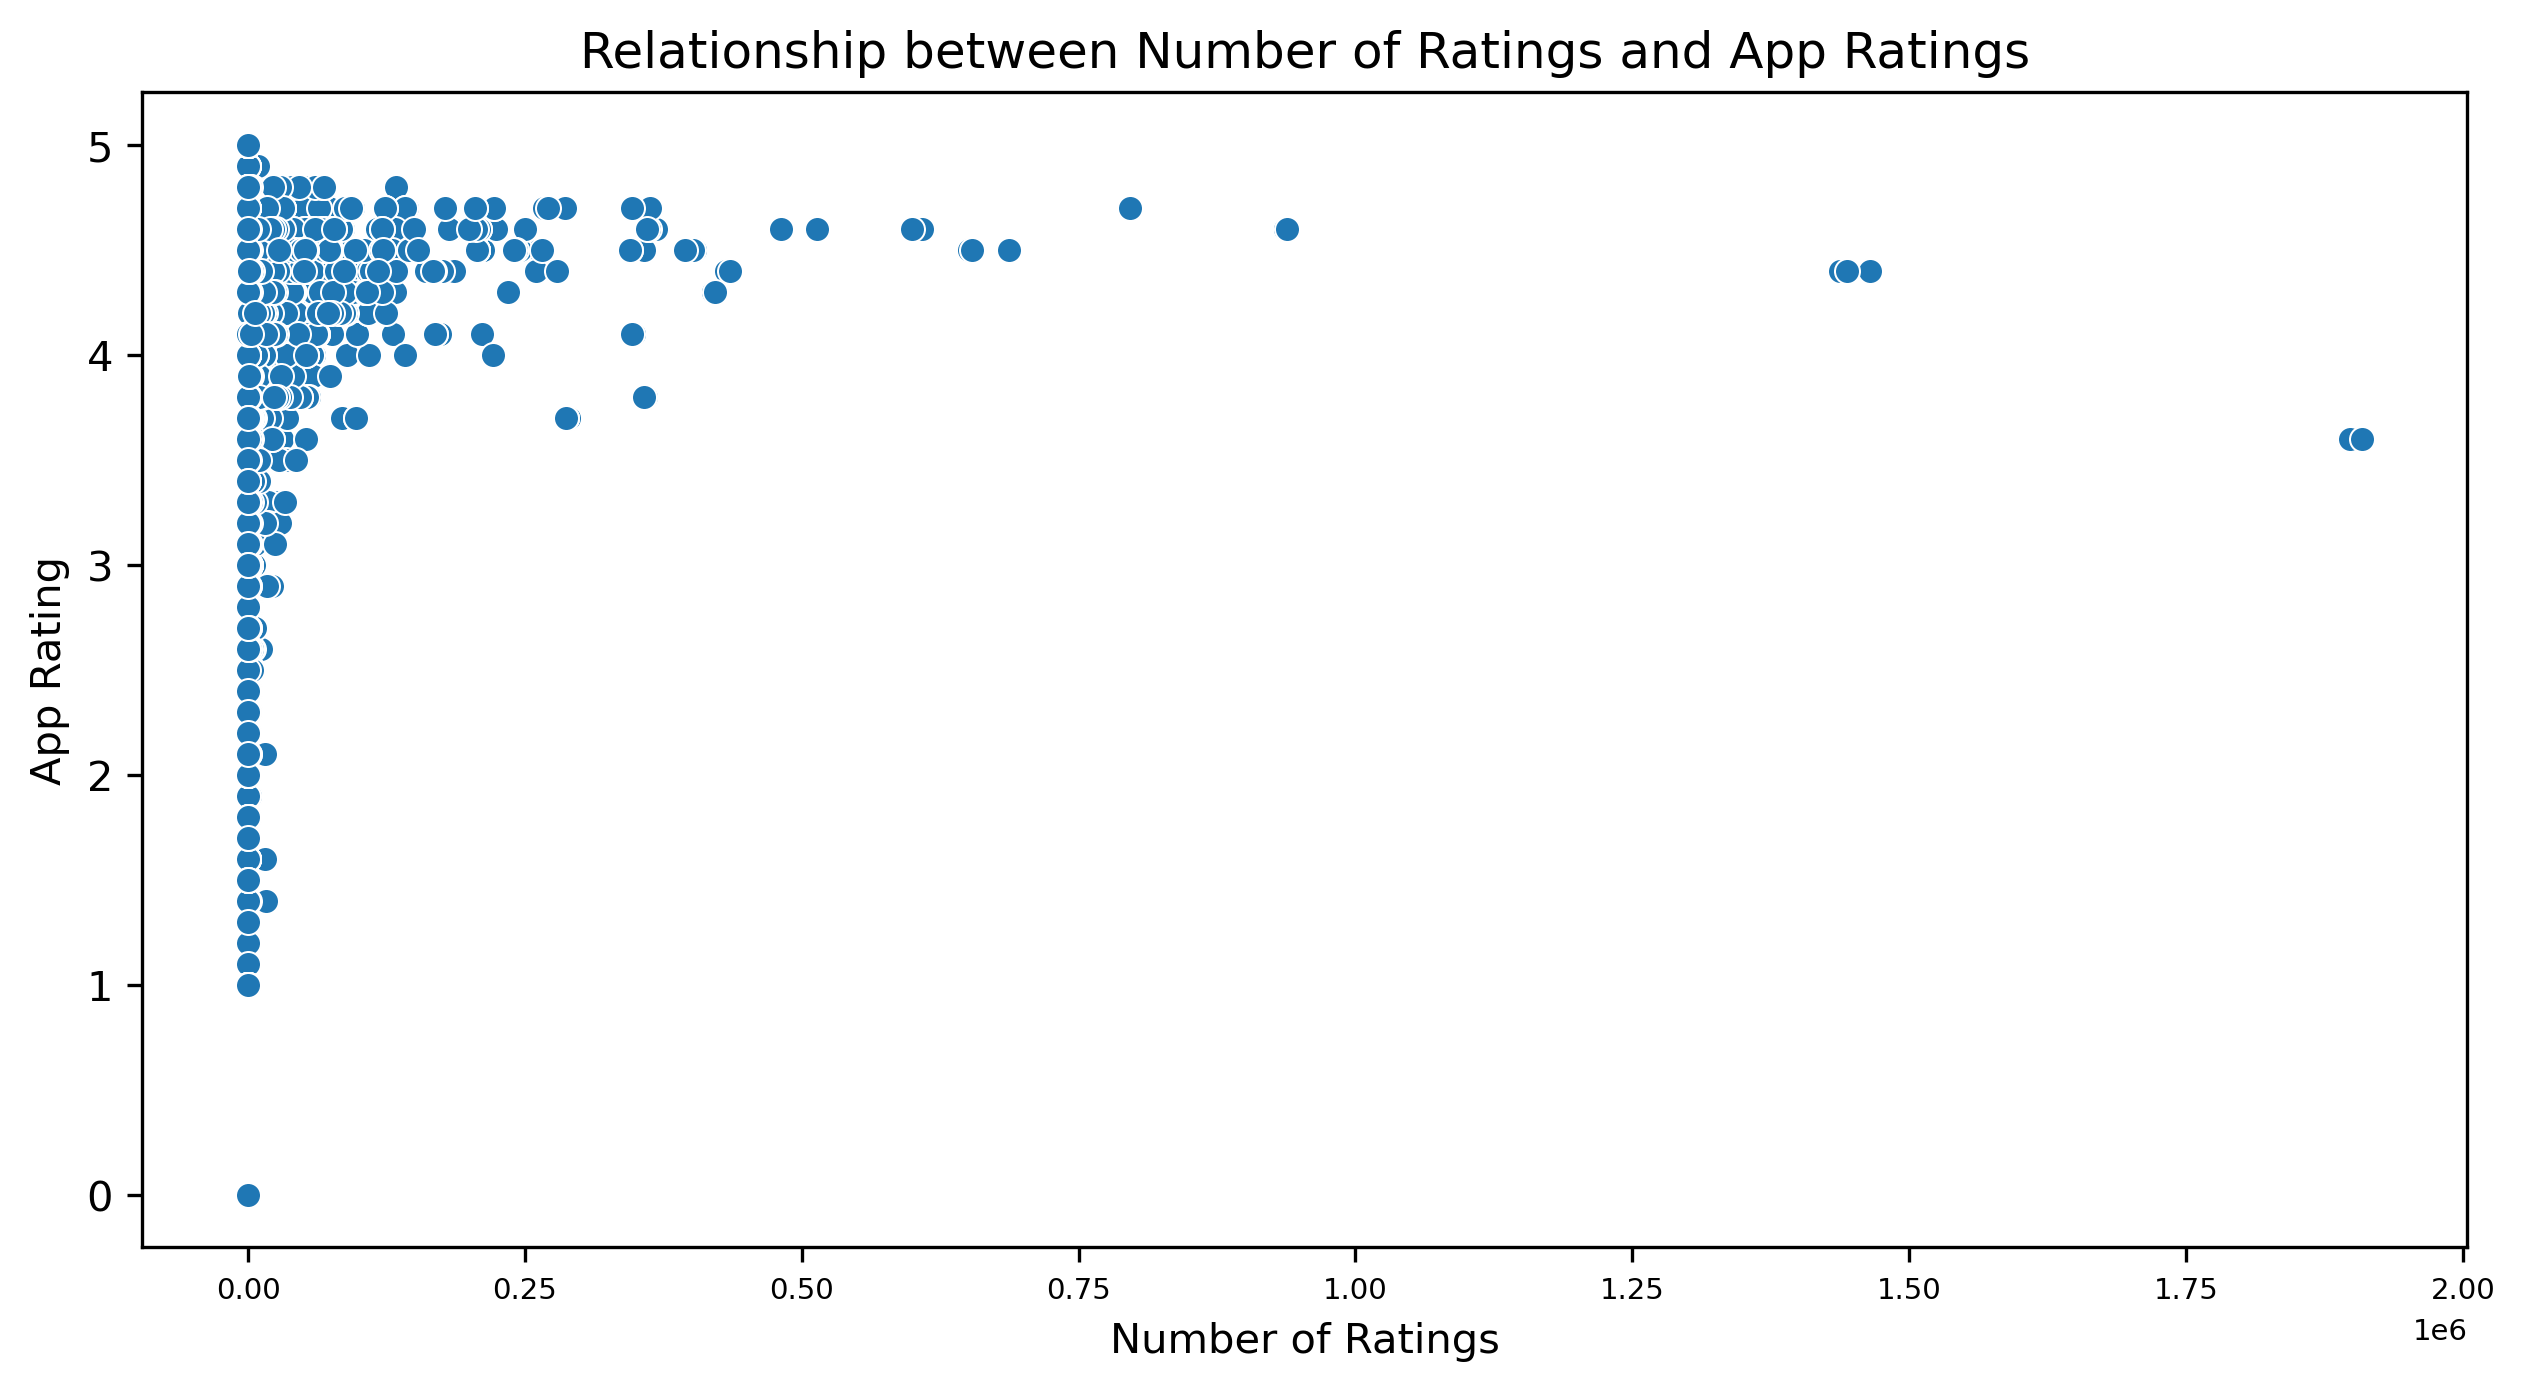

In [14]:
# Analyze the relationship between the number of ratings and app ratings:

import seaborn as sns

sns.scatterplot(x=data['Number of ratings'], y=data['Rating'])
# plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Ratings and App Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('App Rating')
plt.show()

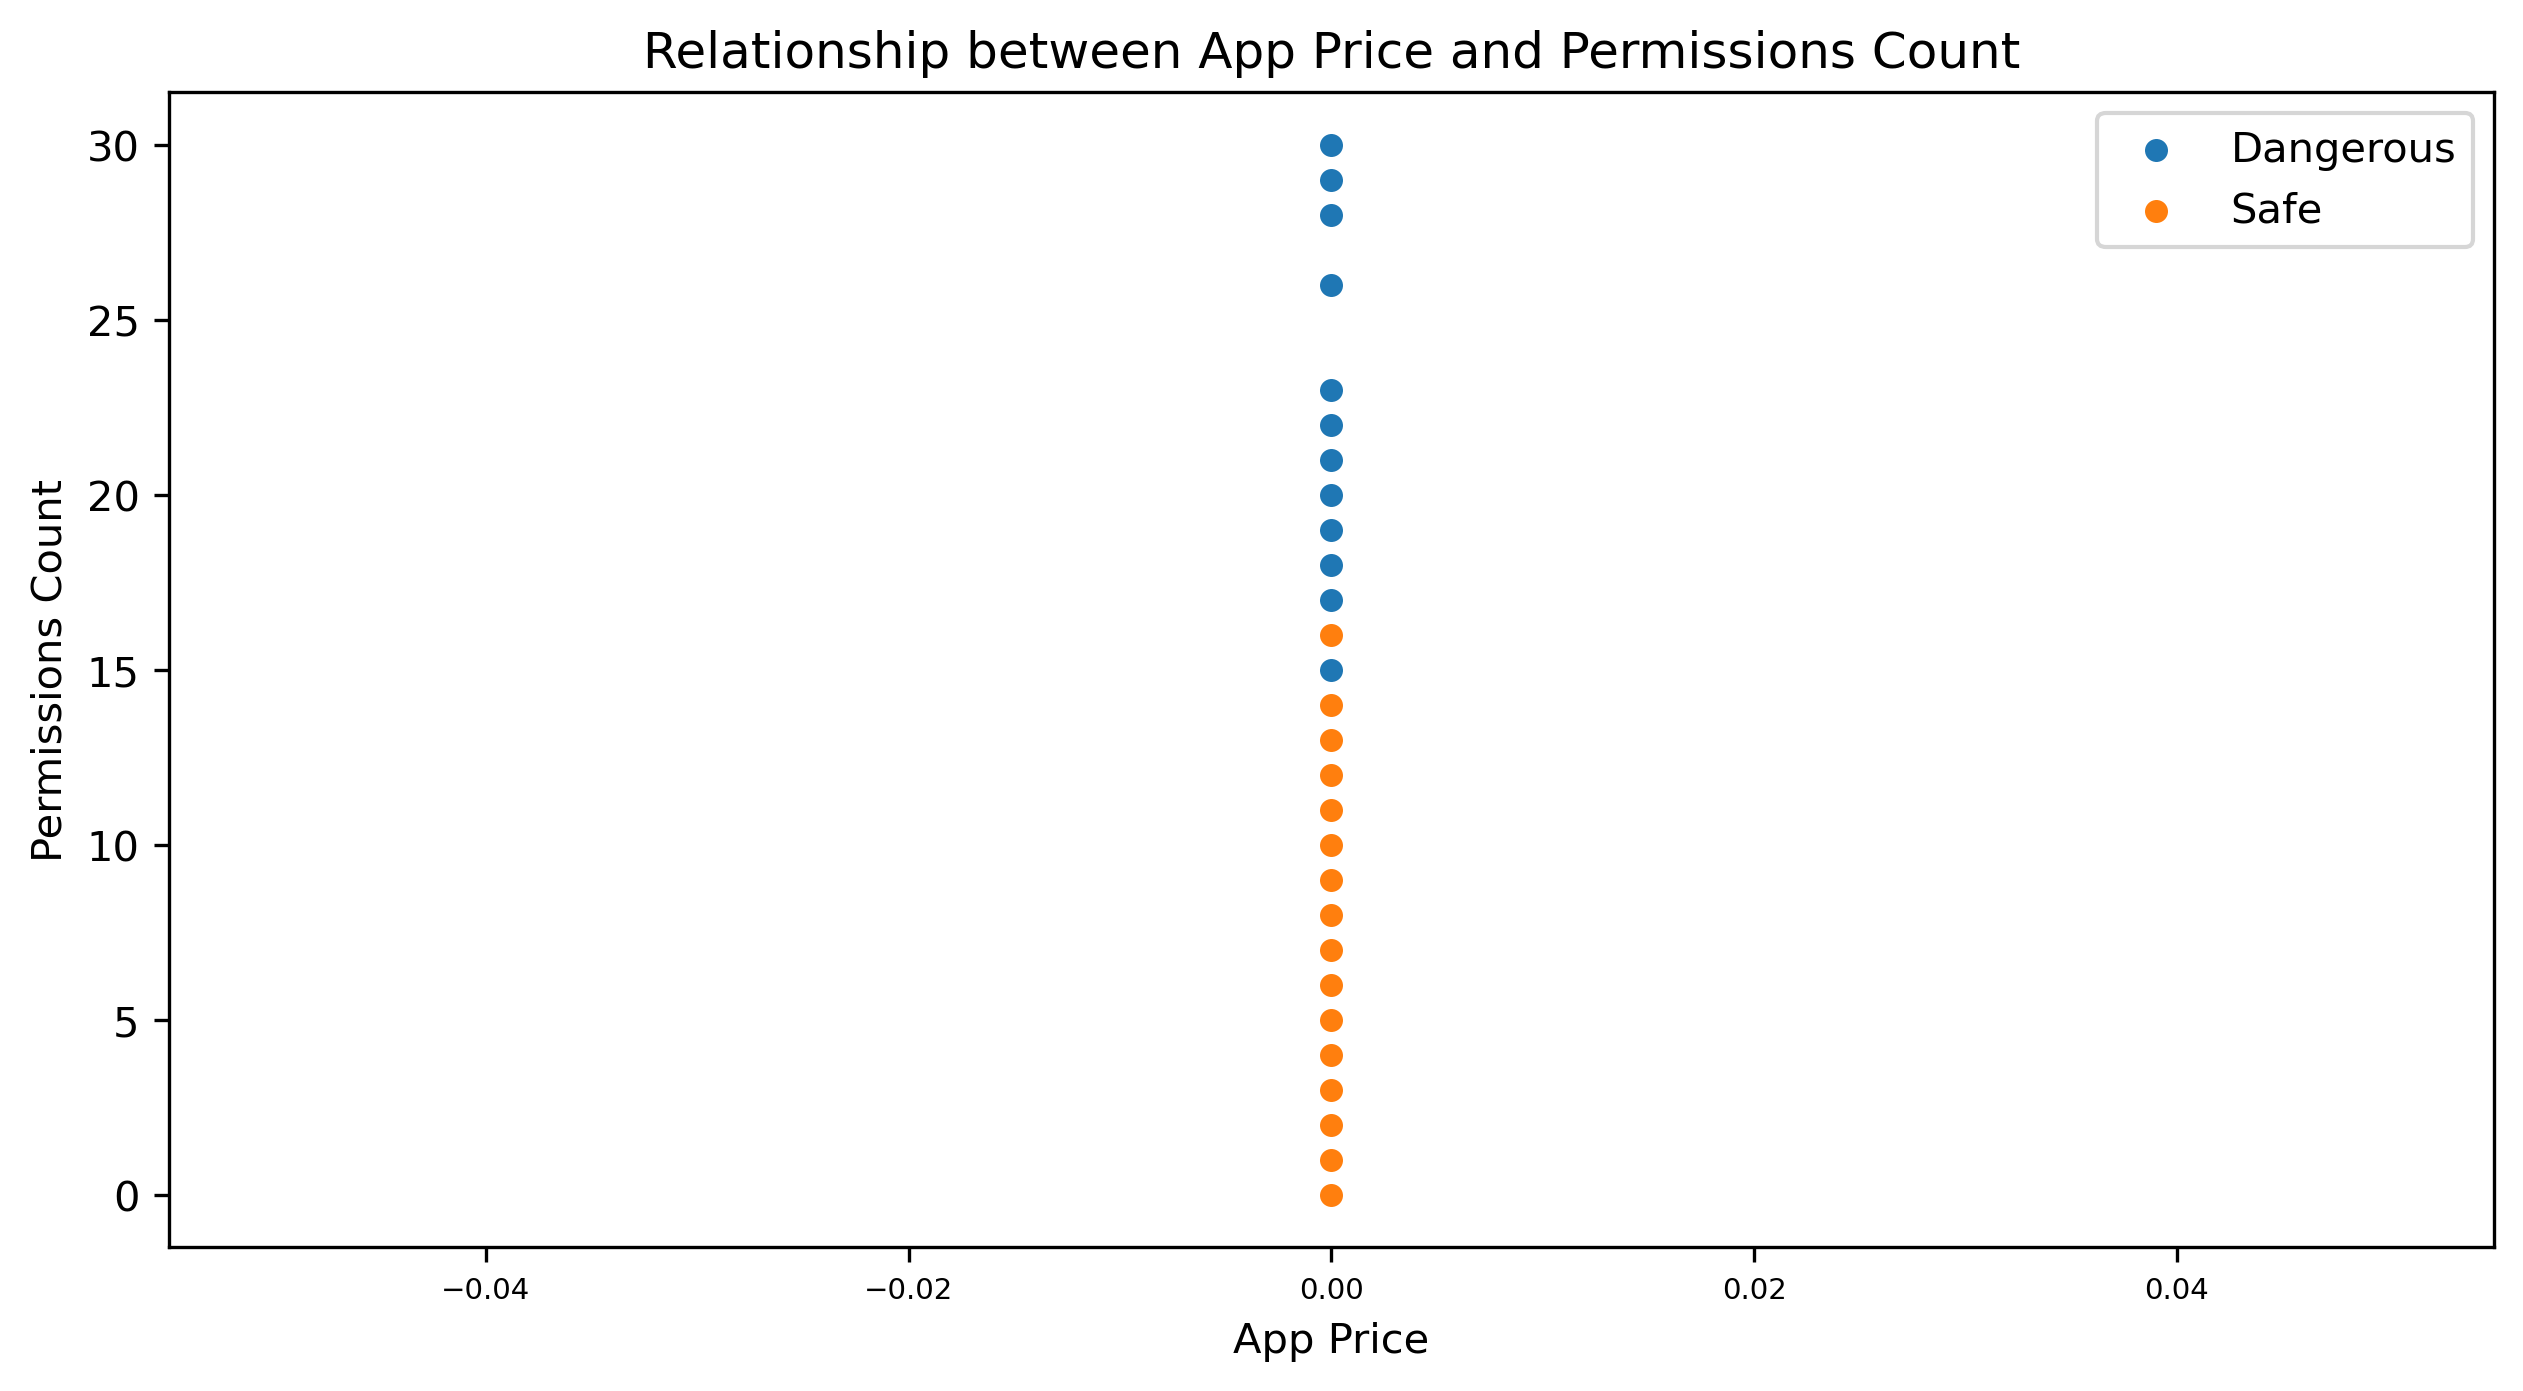

In [15]:
# Analyze the relationship between app price and permissions count:

# Convert price to numeric values
data['Price_numeric'] = data['Price'].apply(lambda x: float(x[1:]) if isinstance(x, str) and x.startswith('$') else 0)

sns.scatterplot(x=data['Price_numeric'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Price_numeric'], y=data['Safe permissions count'], label='Safe')
# plt.figure(figsize=(10, 6))
plt.title('Relationship between App Price and Permissions Count')
plt.xlabel('App Price')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()

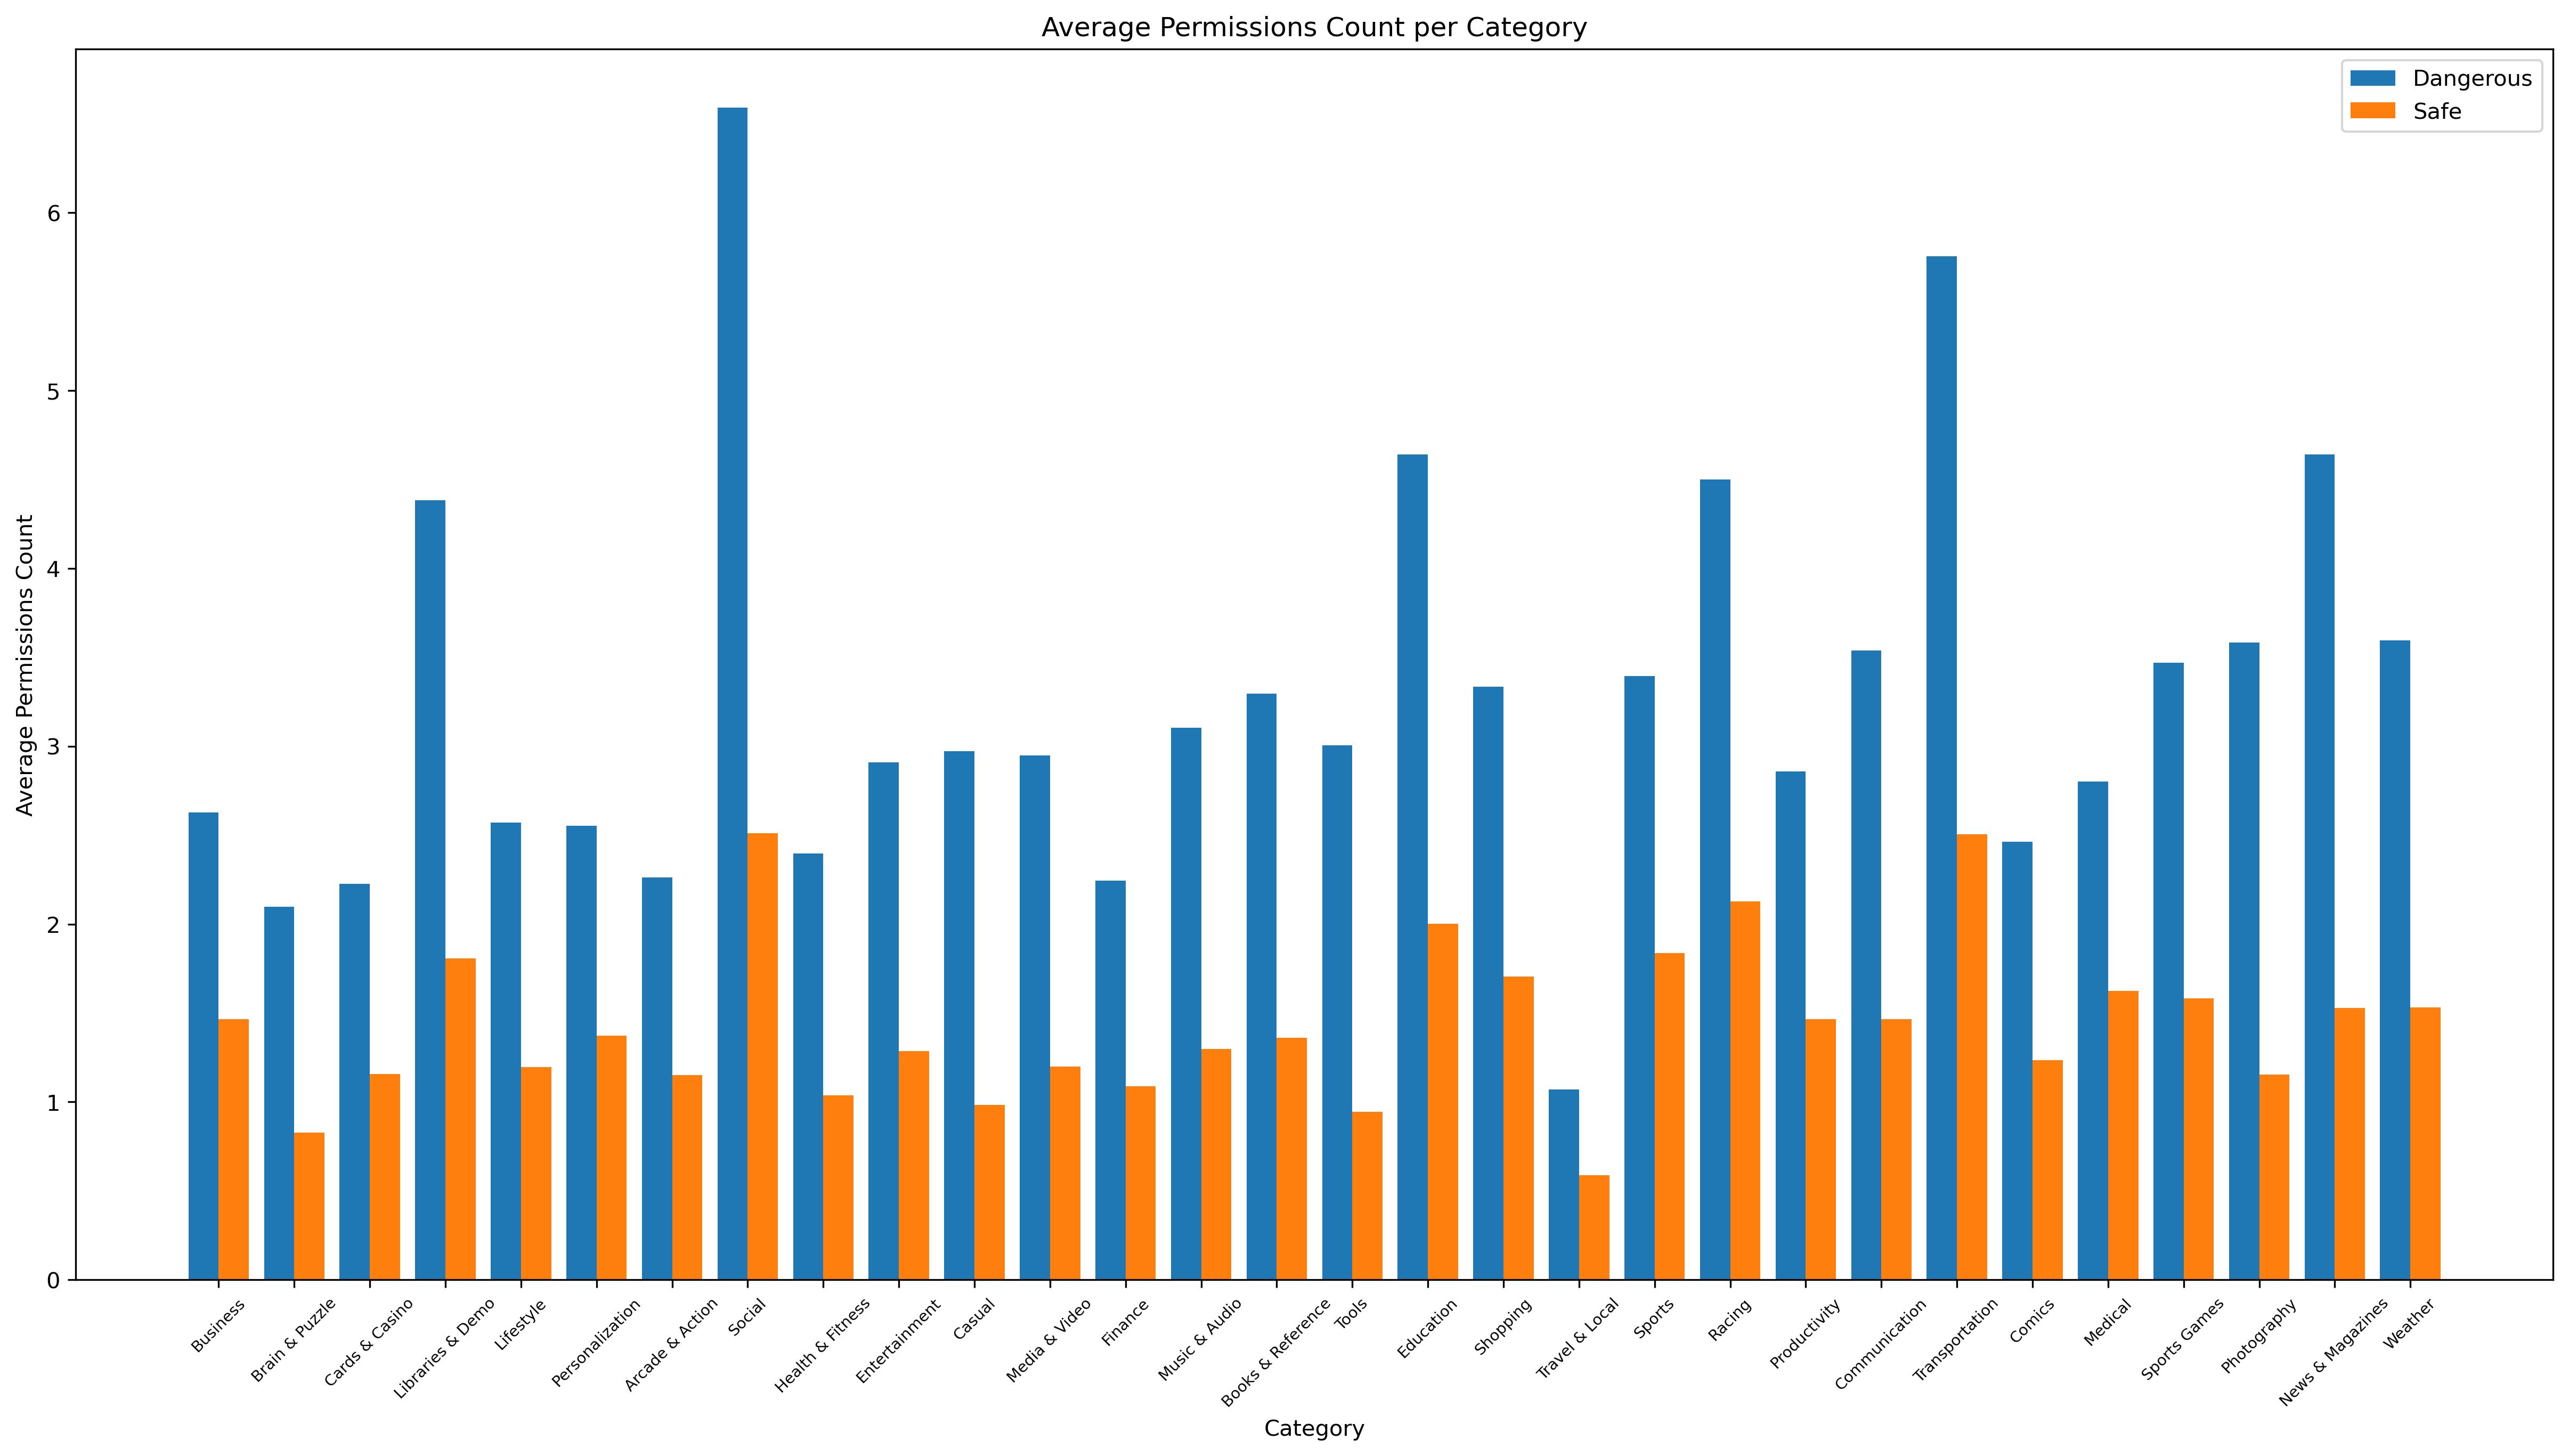

In [16]:
category_dangerous_mean = data1.groupby('Category')['Dangerous permissions count'].mean()
category_safe_mean = data1.groupby('Category')['Safe permissions count'].mean()

categories = data1['Category'].unique()
x = np.arange(len(categories))
width = 0.4

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, category_dangerous_mean, width, label='Dangerous')
rects2 = ax.bar(x + width/2, category_safe_mean, width, label='Safe')

ax.set_title('Average Permissions Count per Category')
ax.set_xlabel('Category')
ax.set_ylabel('Average Permissions Count')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.show()

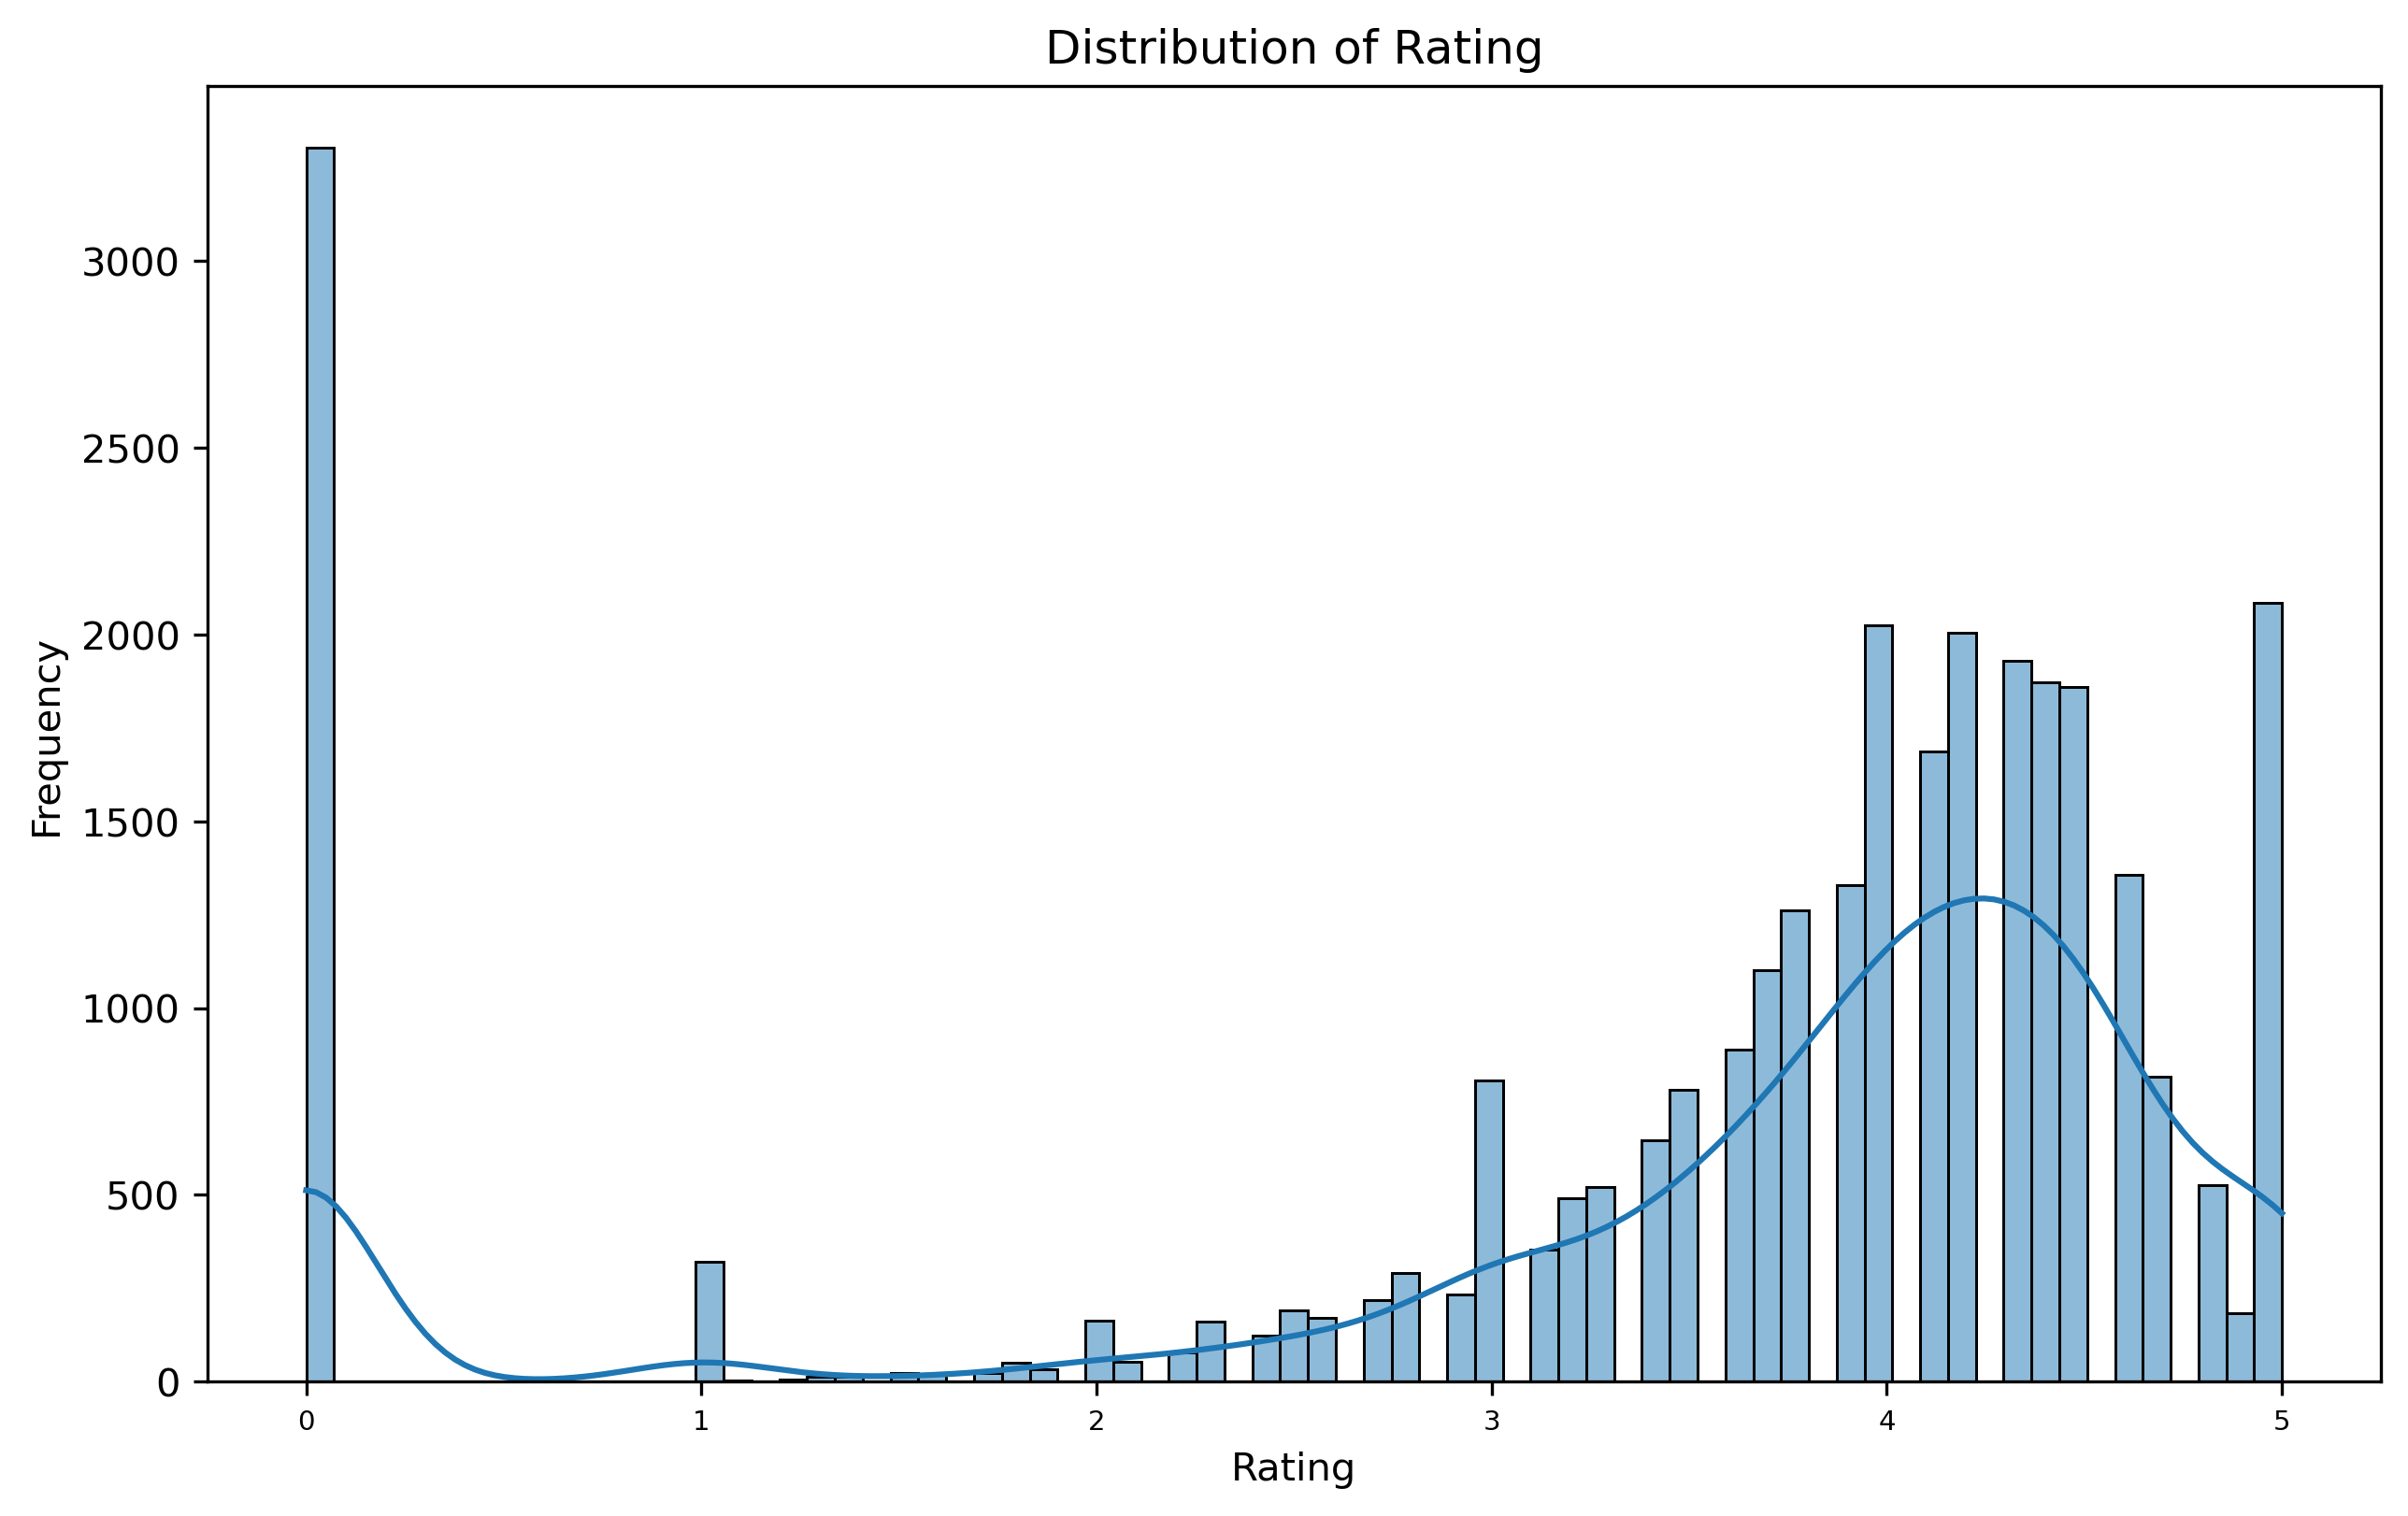

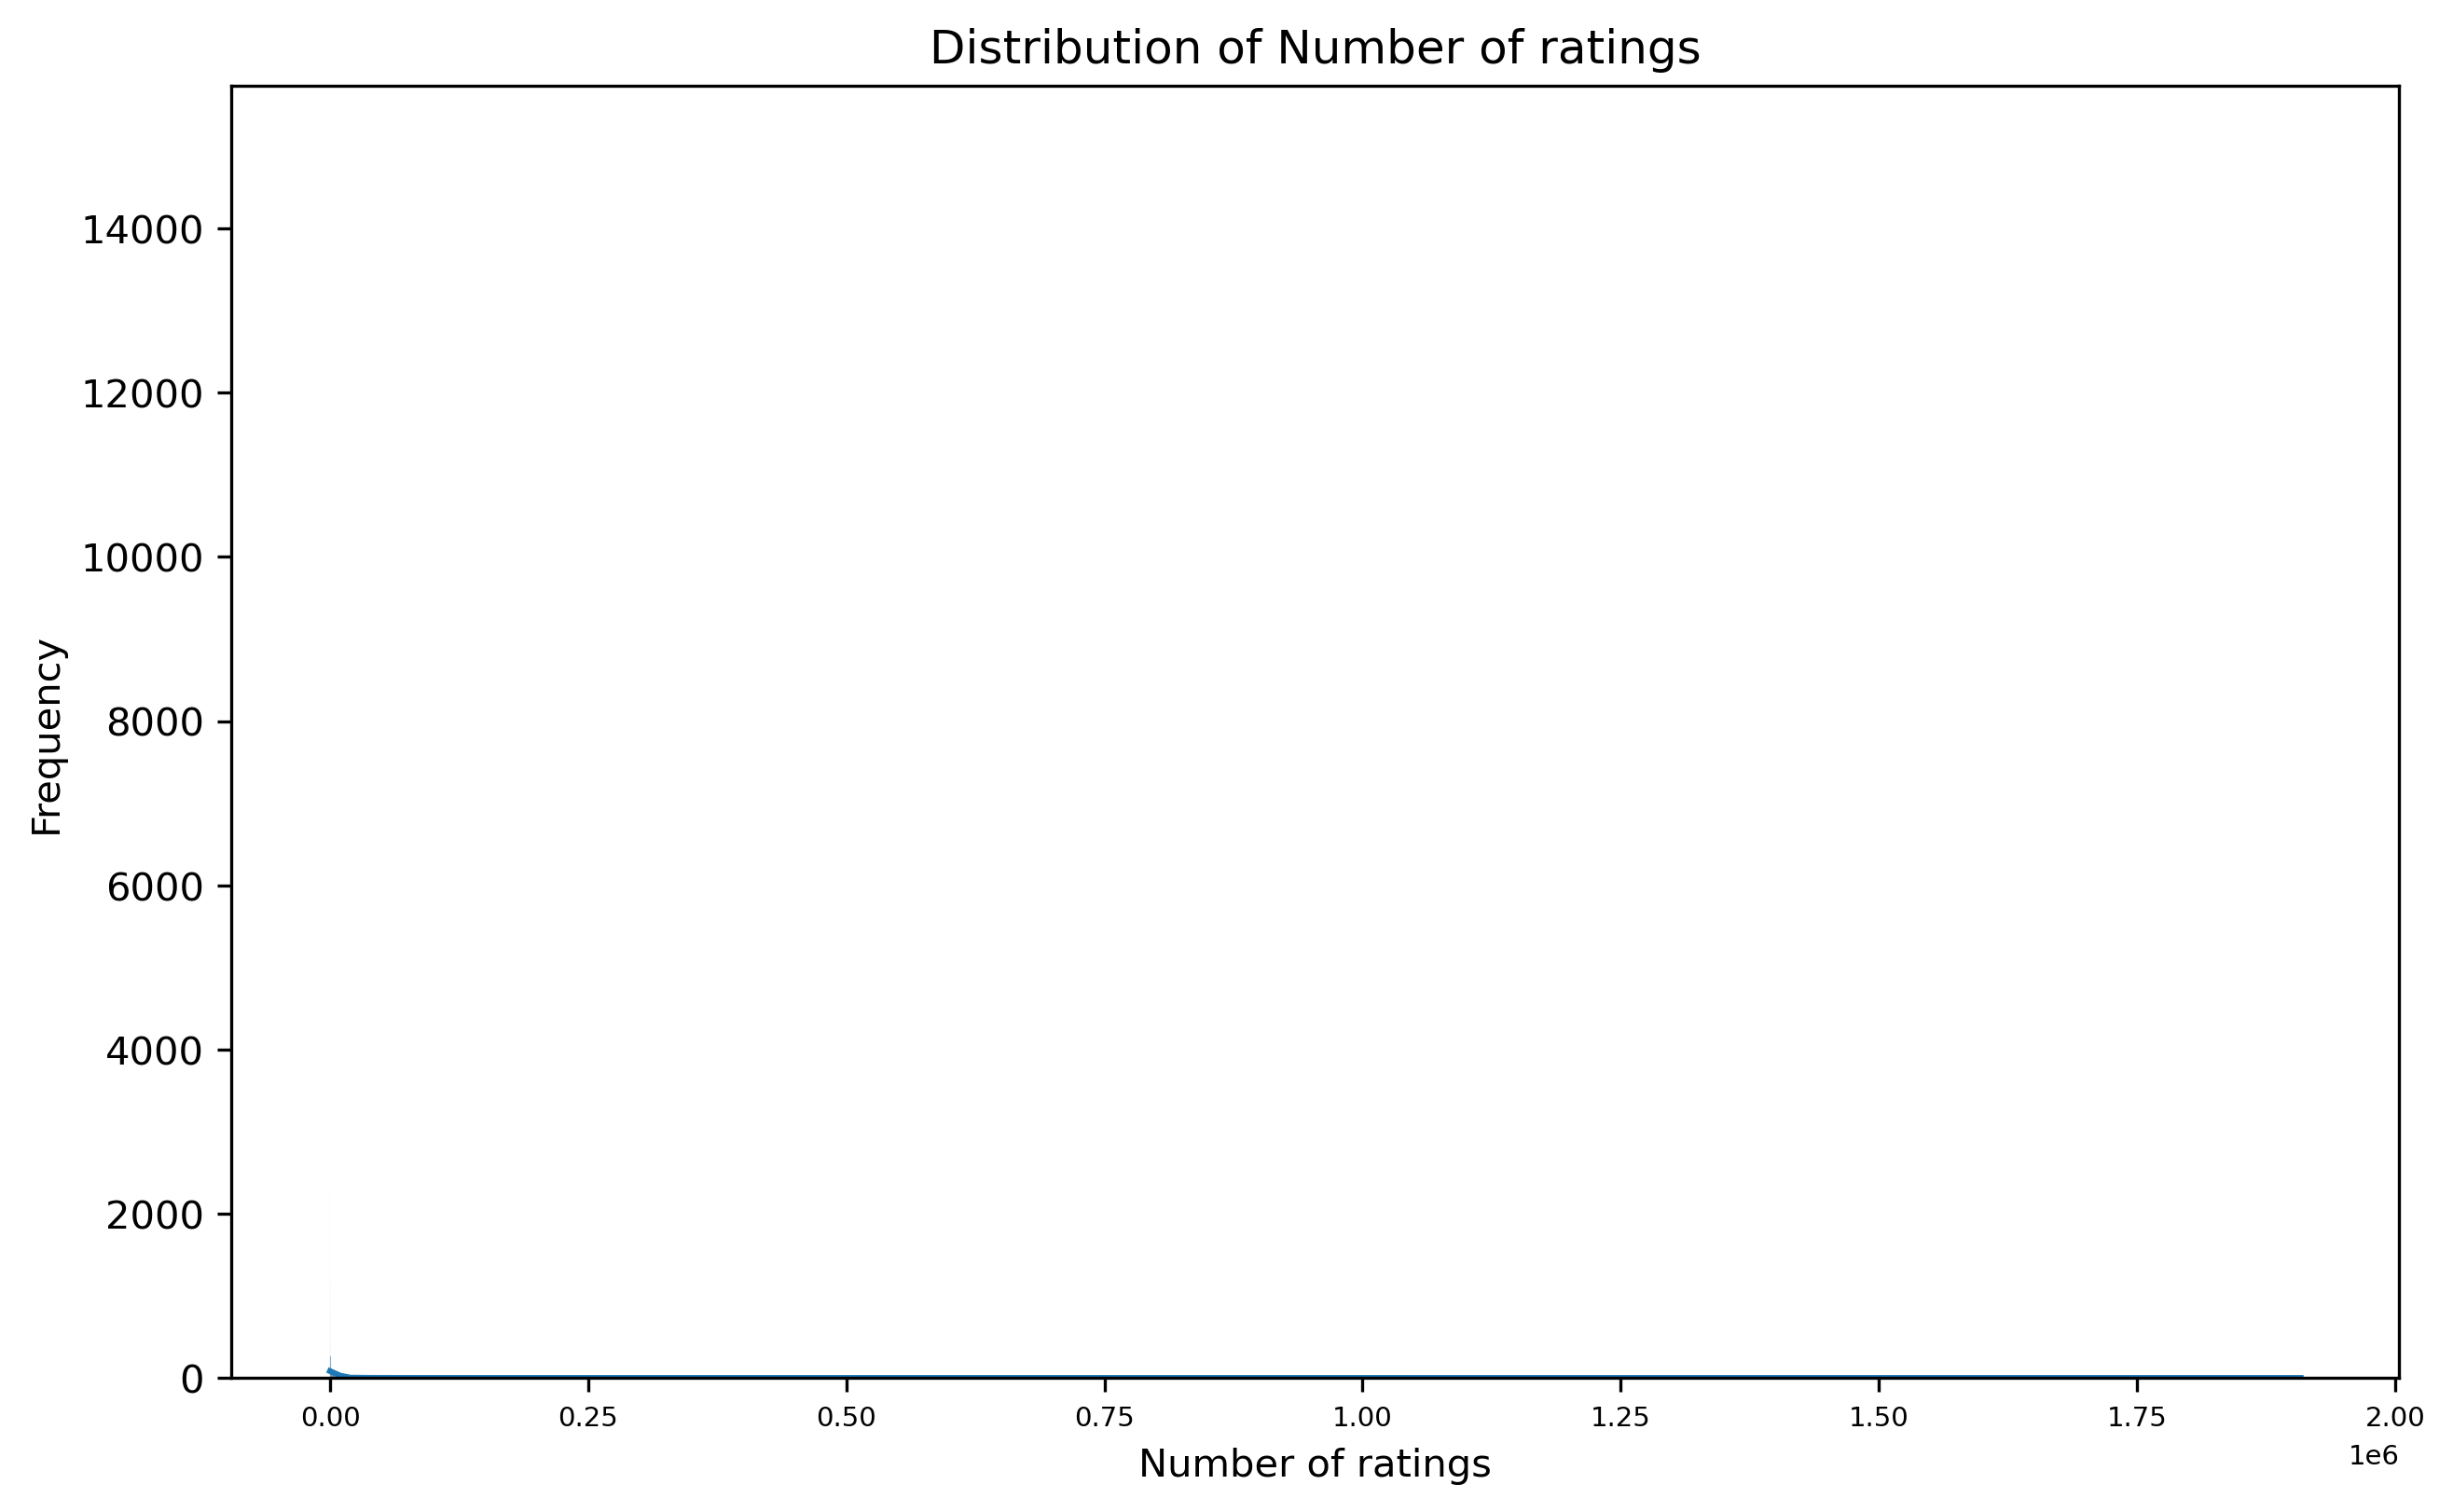

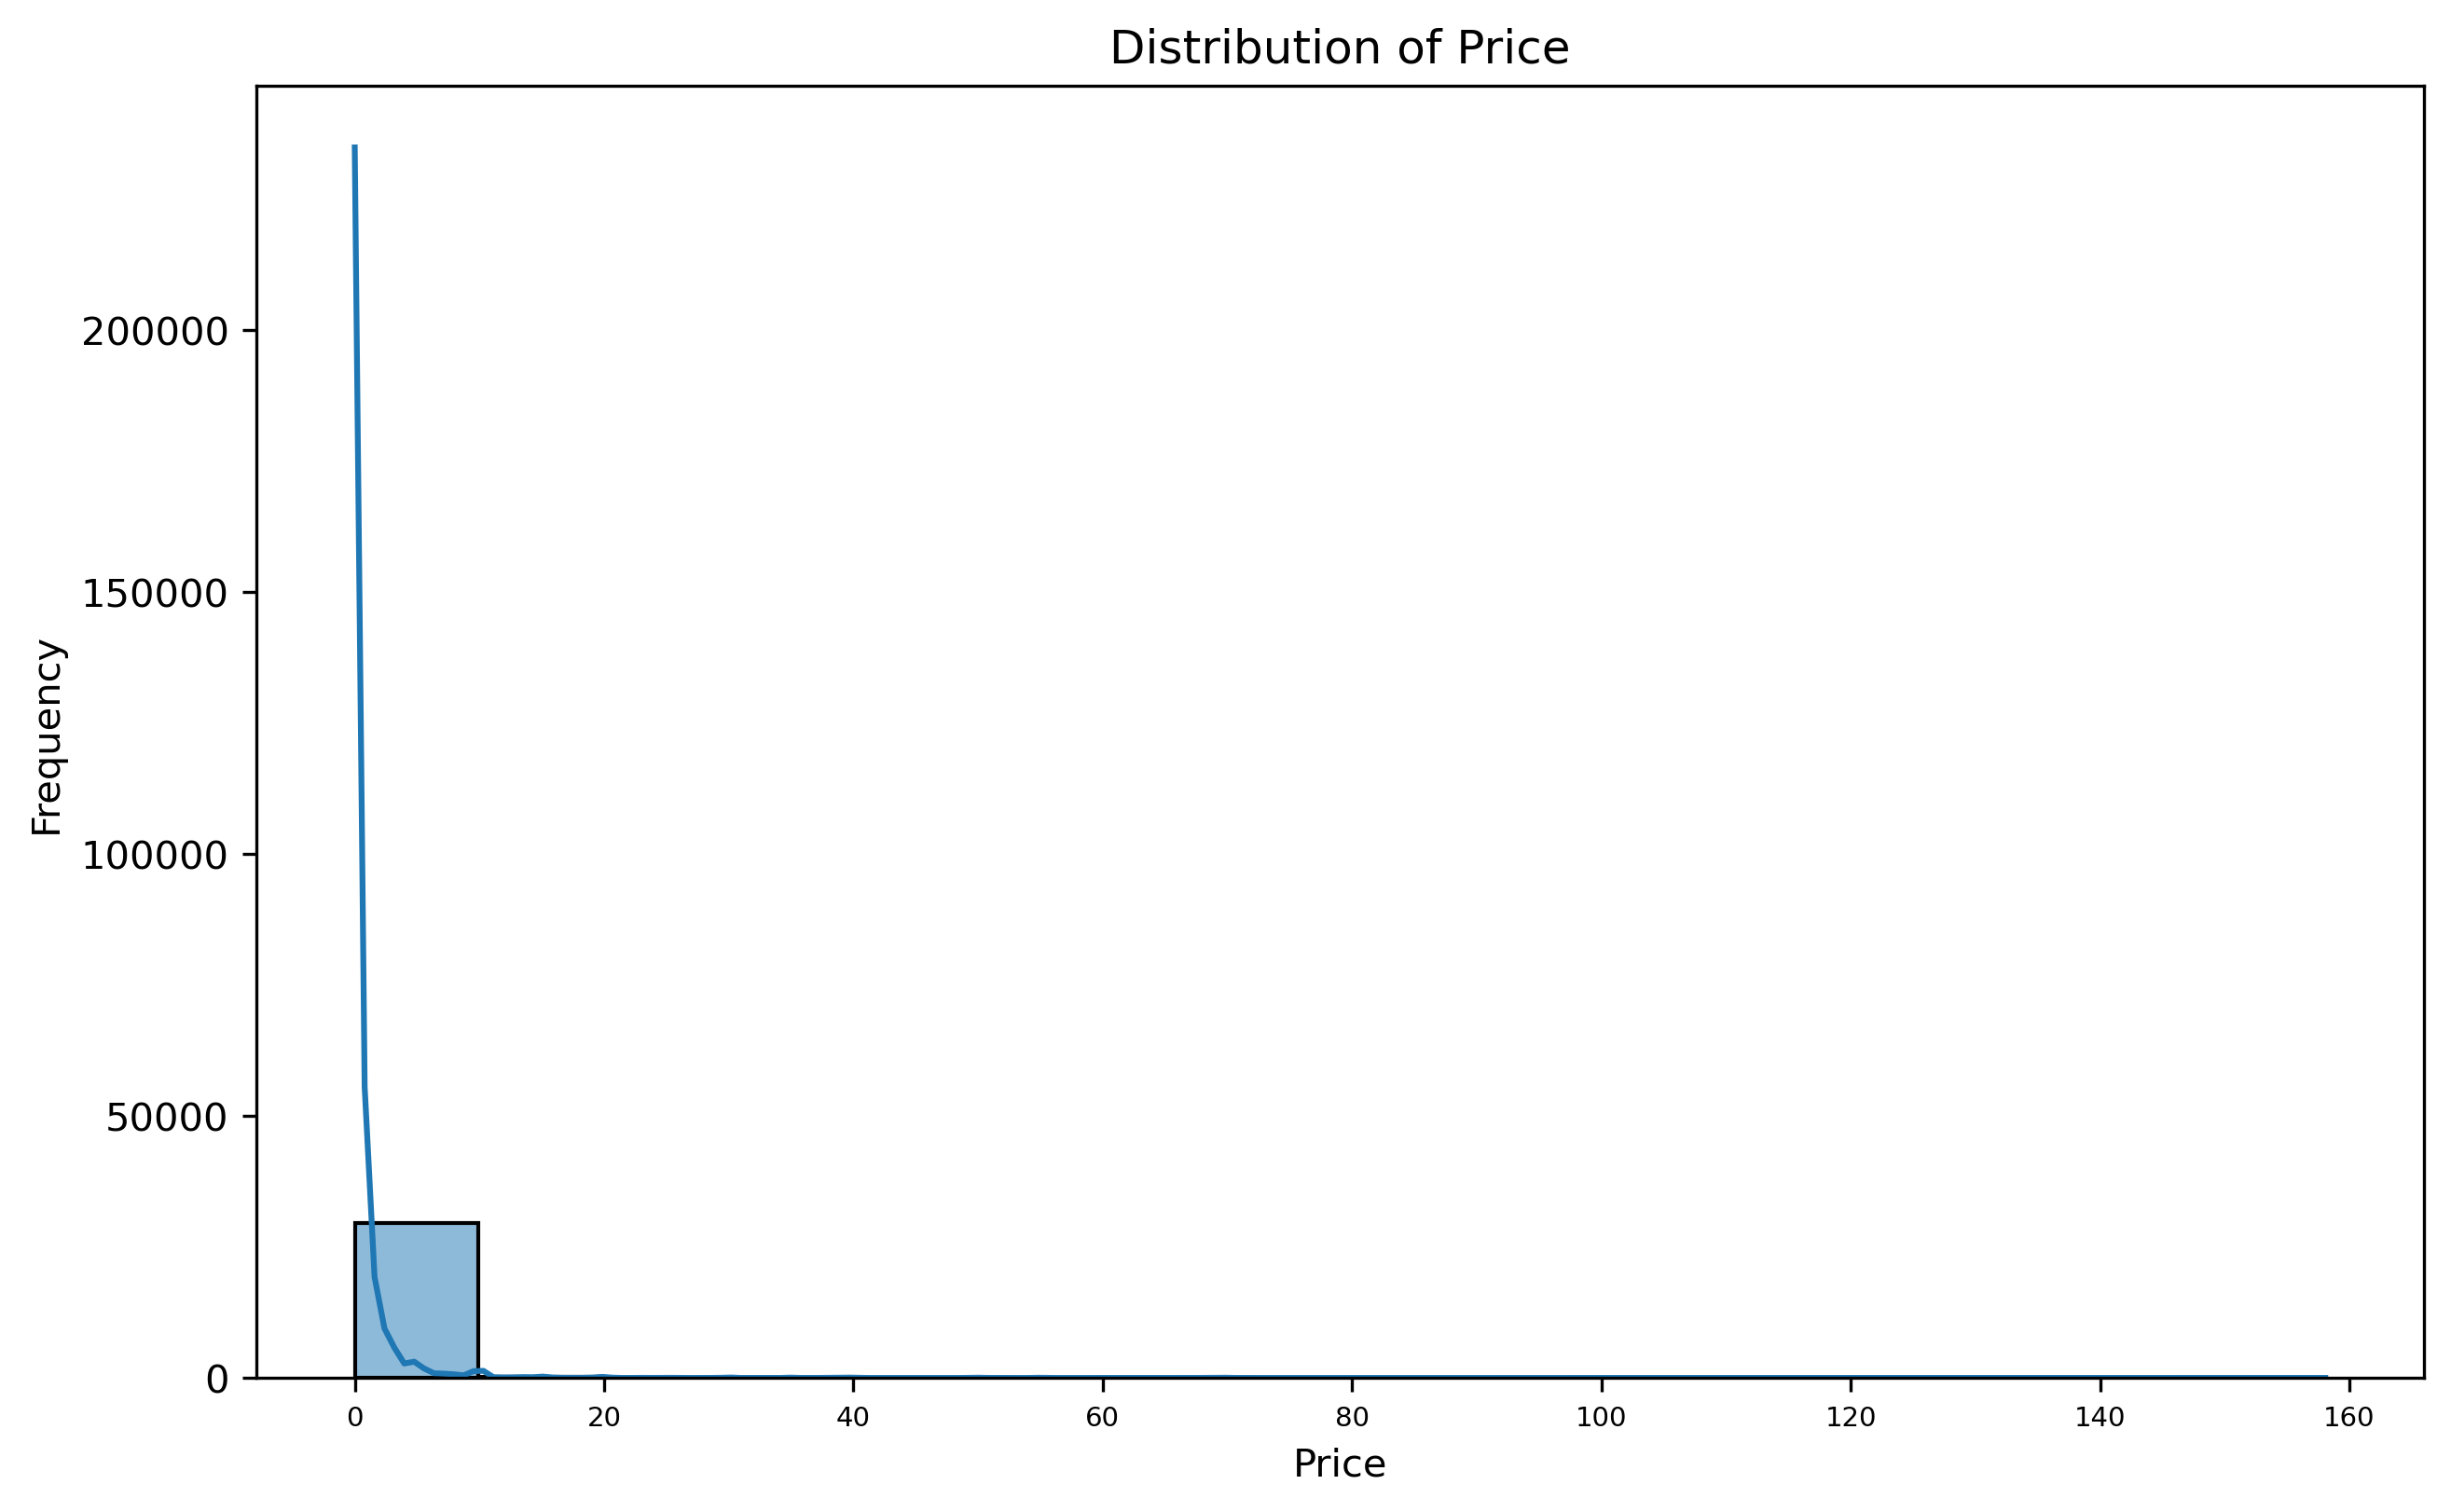

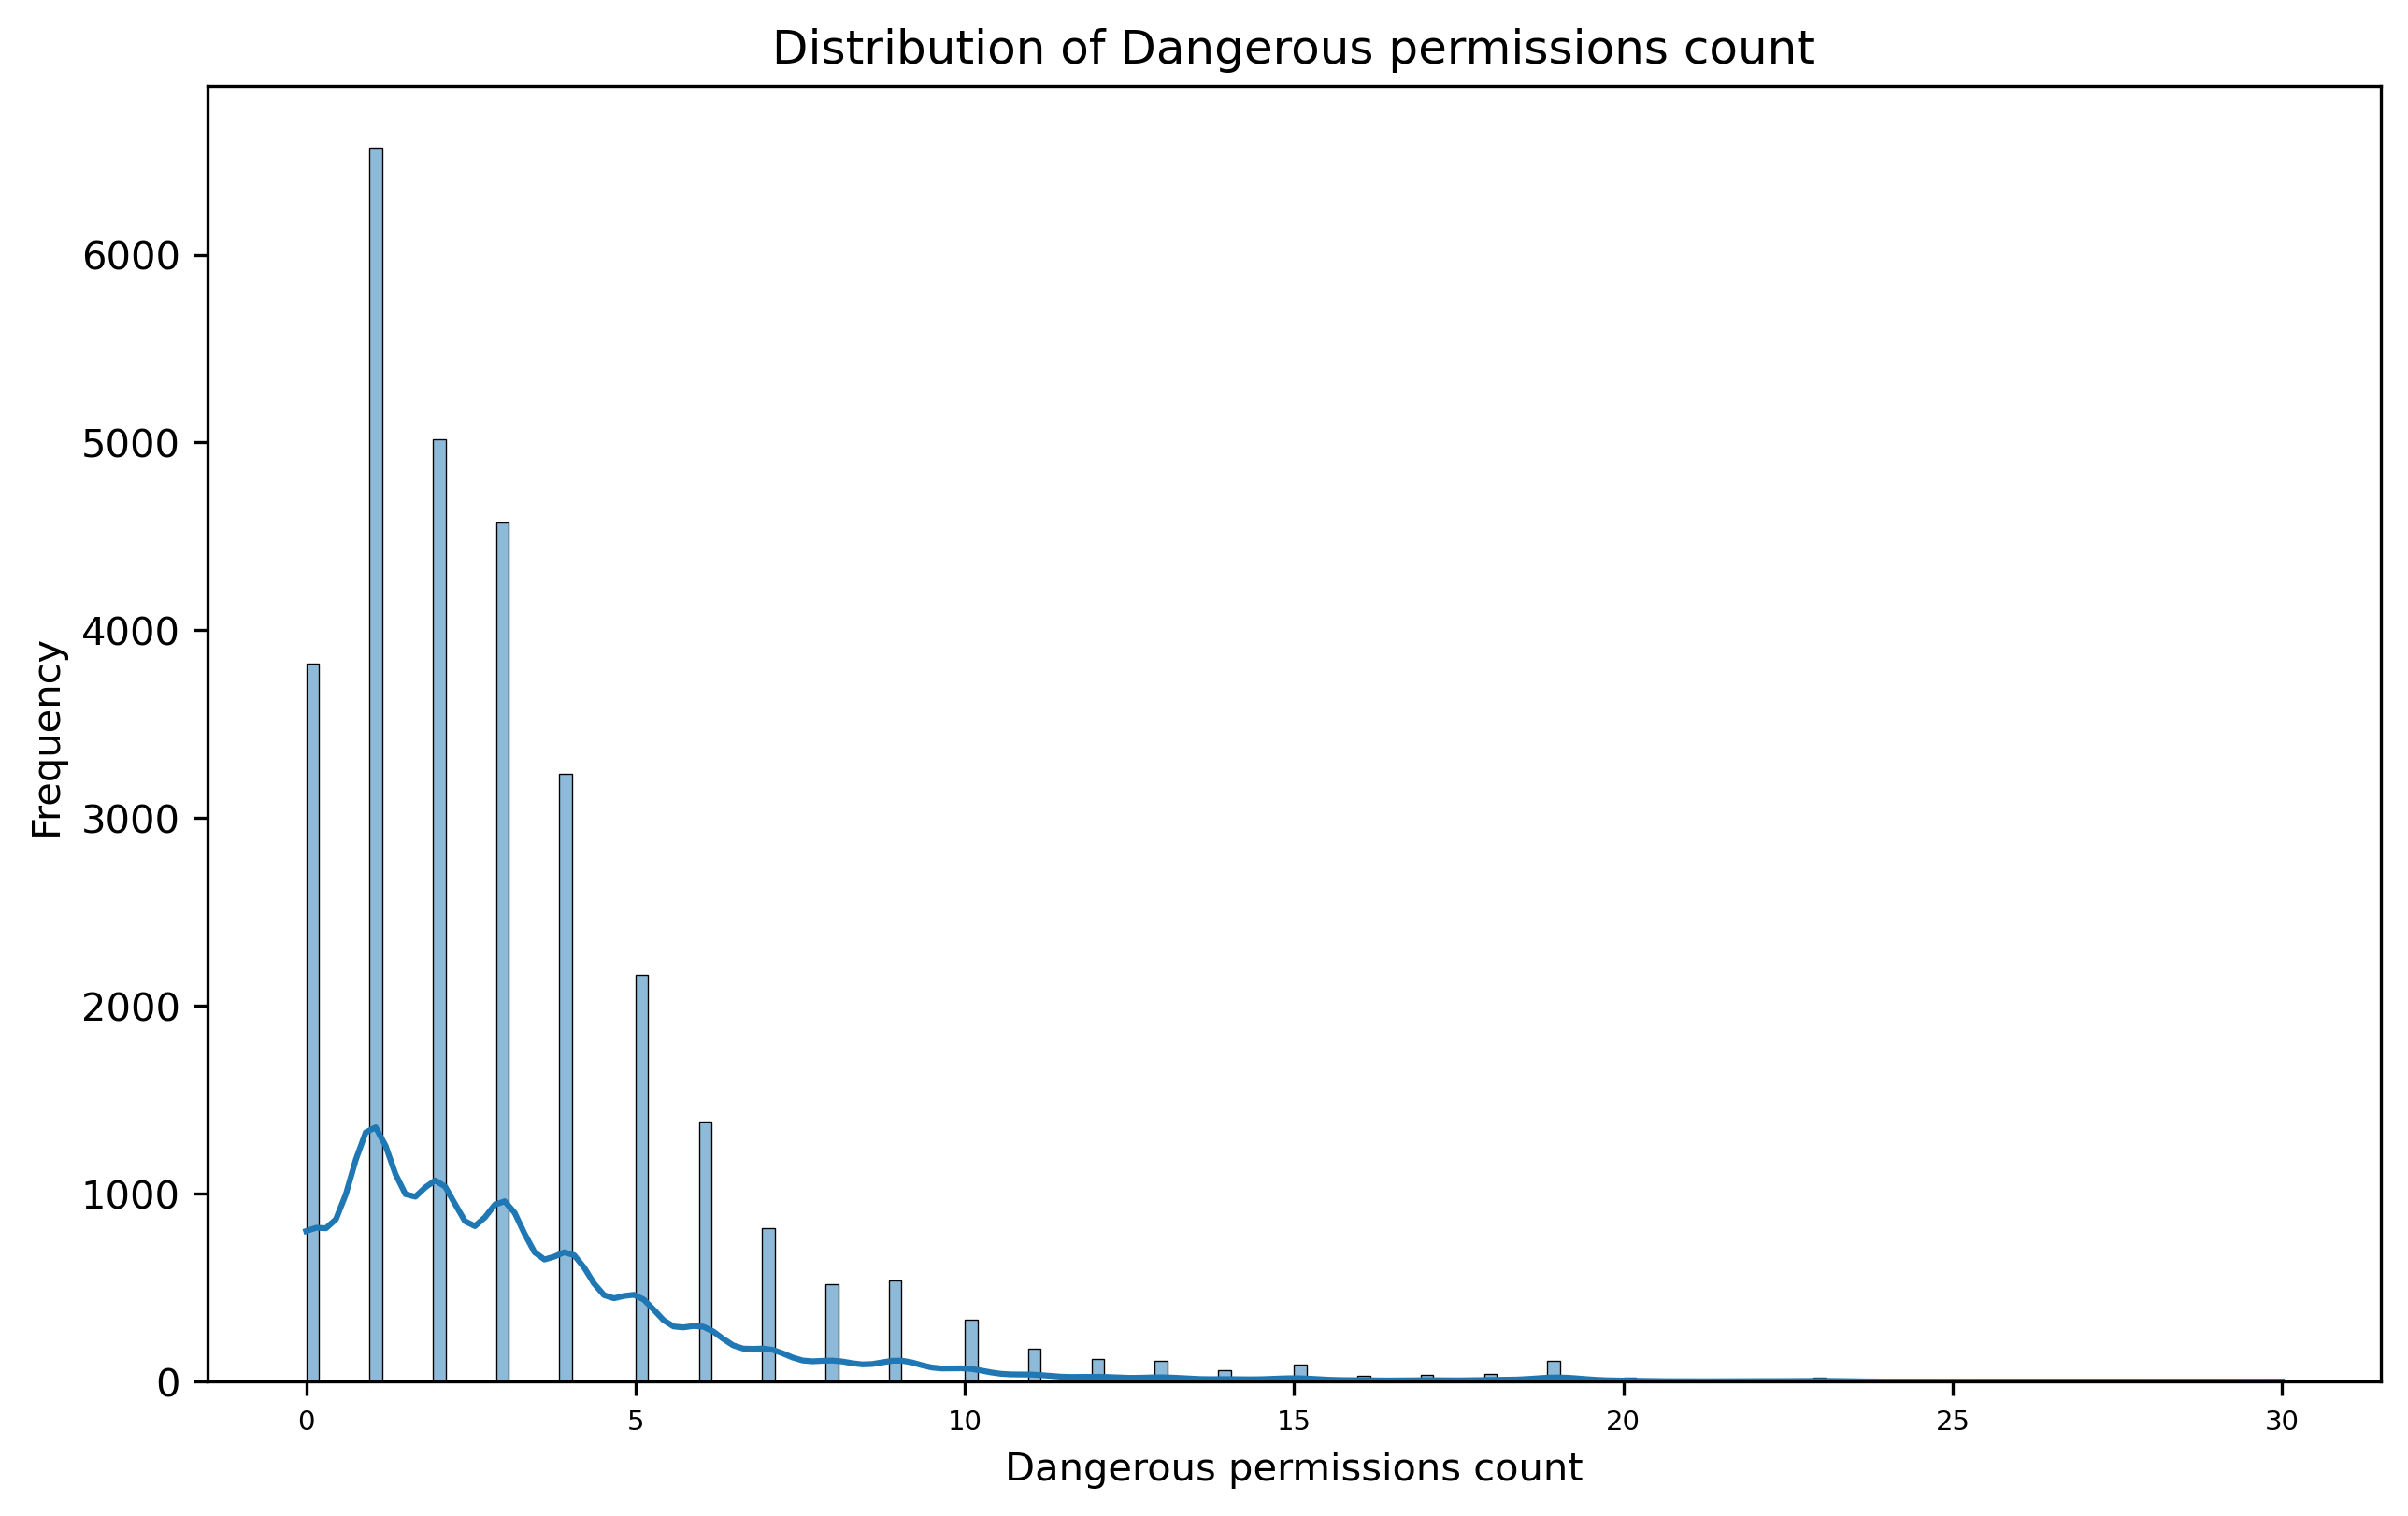

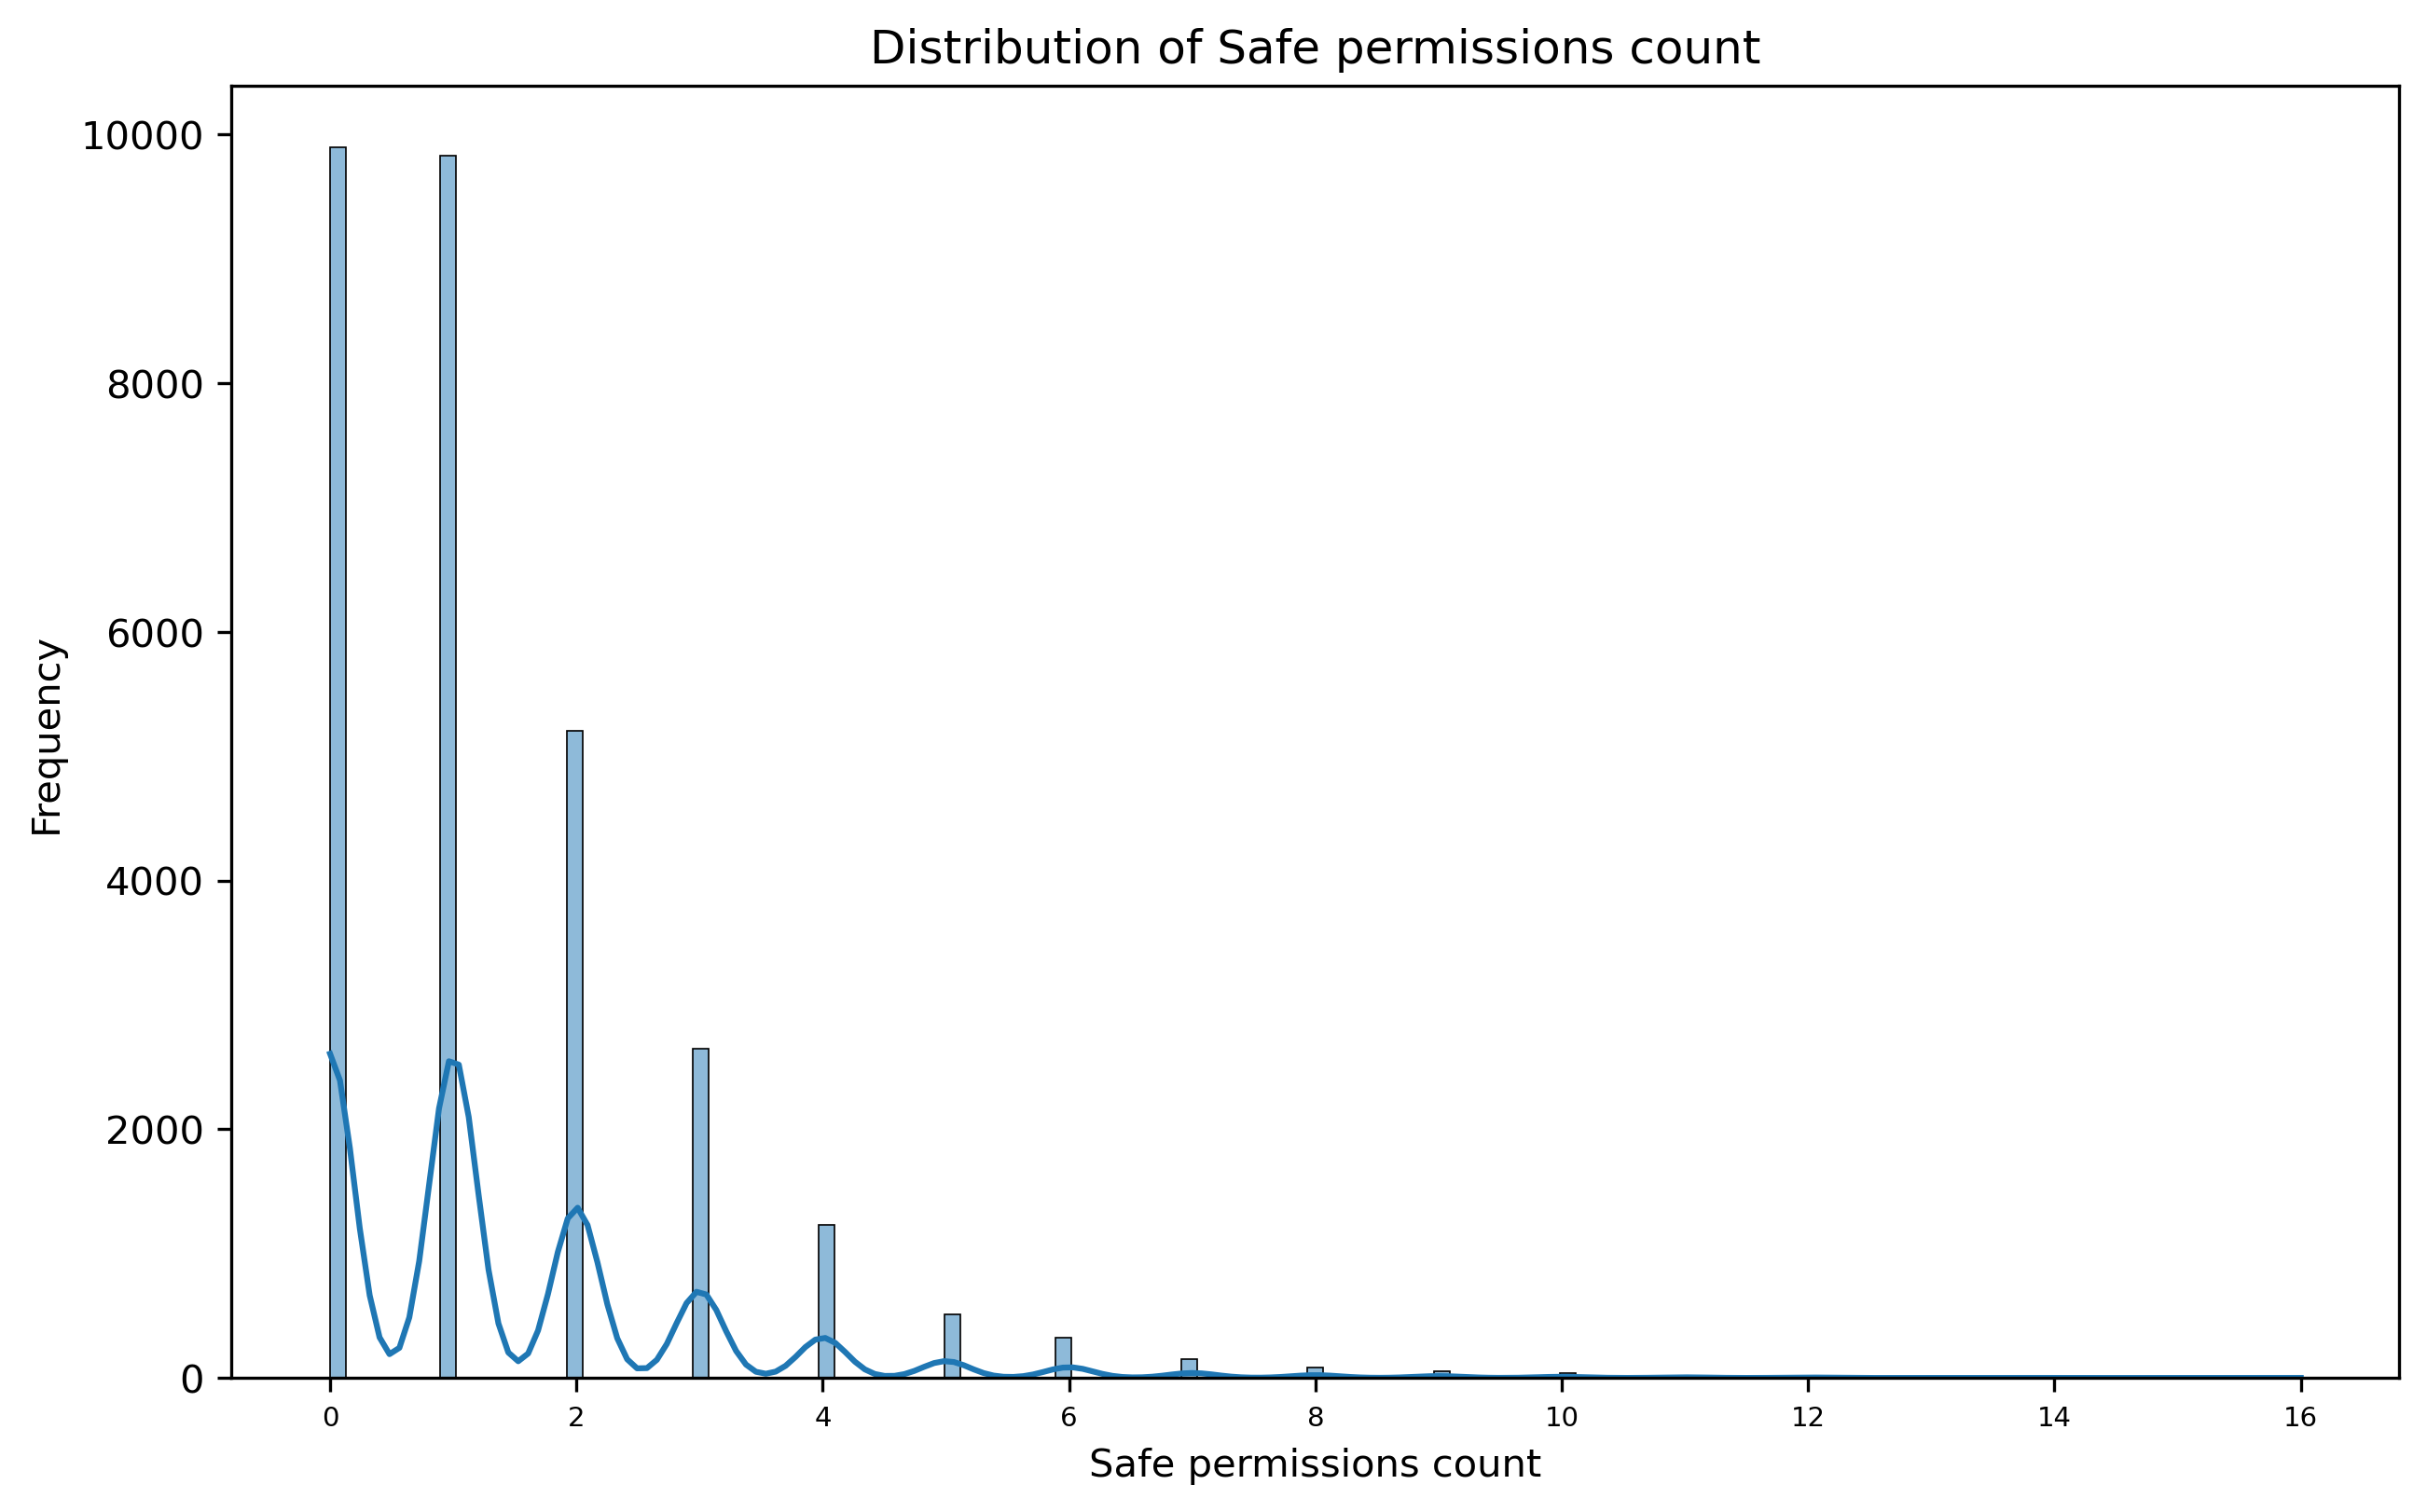

In [17]:
# Analyze the distribution of each feature

# Get the list of features
features = data1.columns.tolist()

# Remove non-numeric features
features.remove('App')
features.remove('Package')
features.remove('Category')
features.remove('Description')
features.remove('Related apps')

count = 0
# Plot the distribution of each feature
for feature in features:
    if count < 5:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[feature], kde=True)
        plt.title('Distribution of ' + feature)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        count = count+1

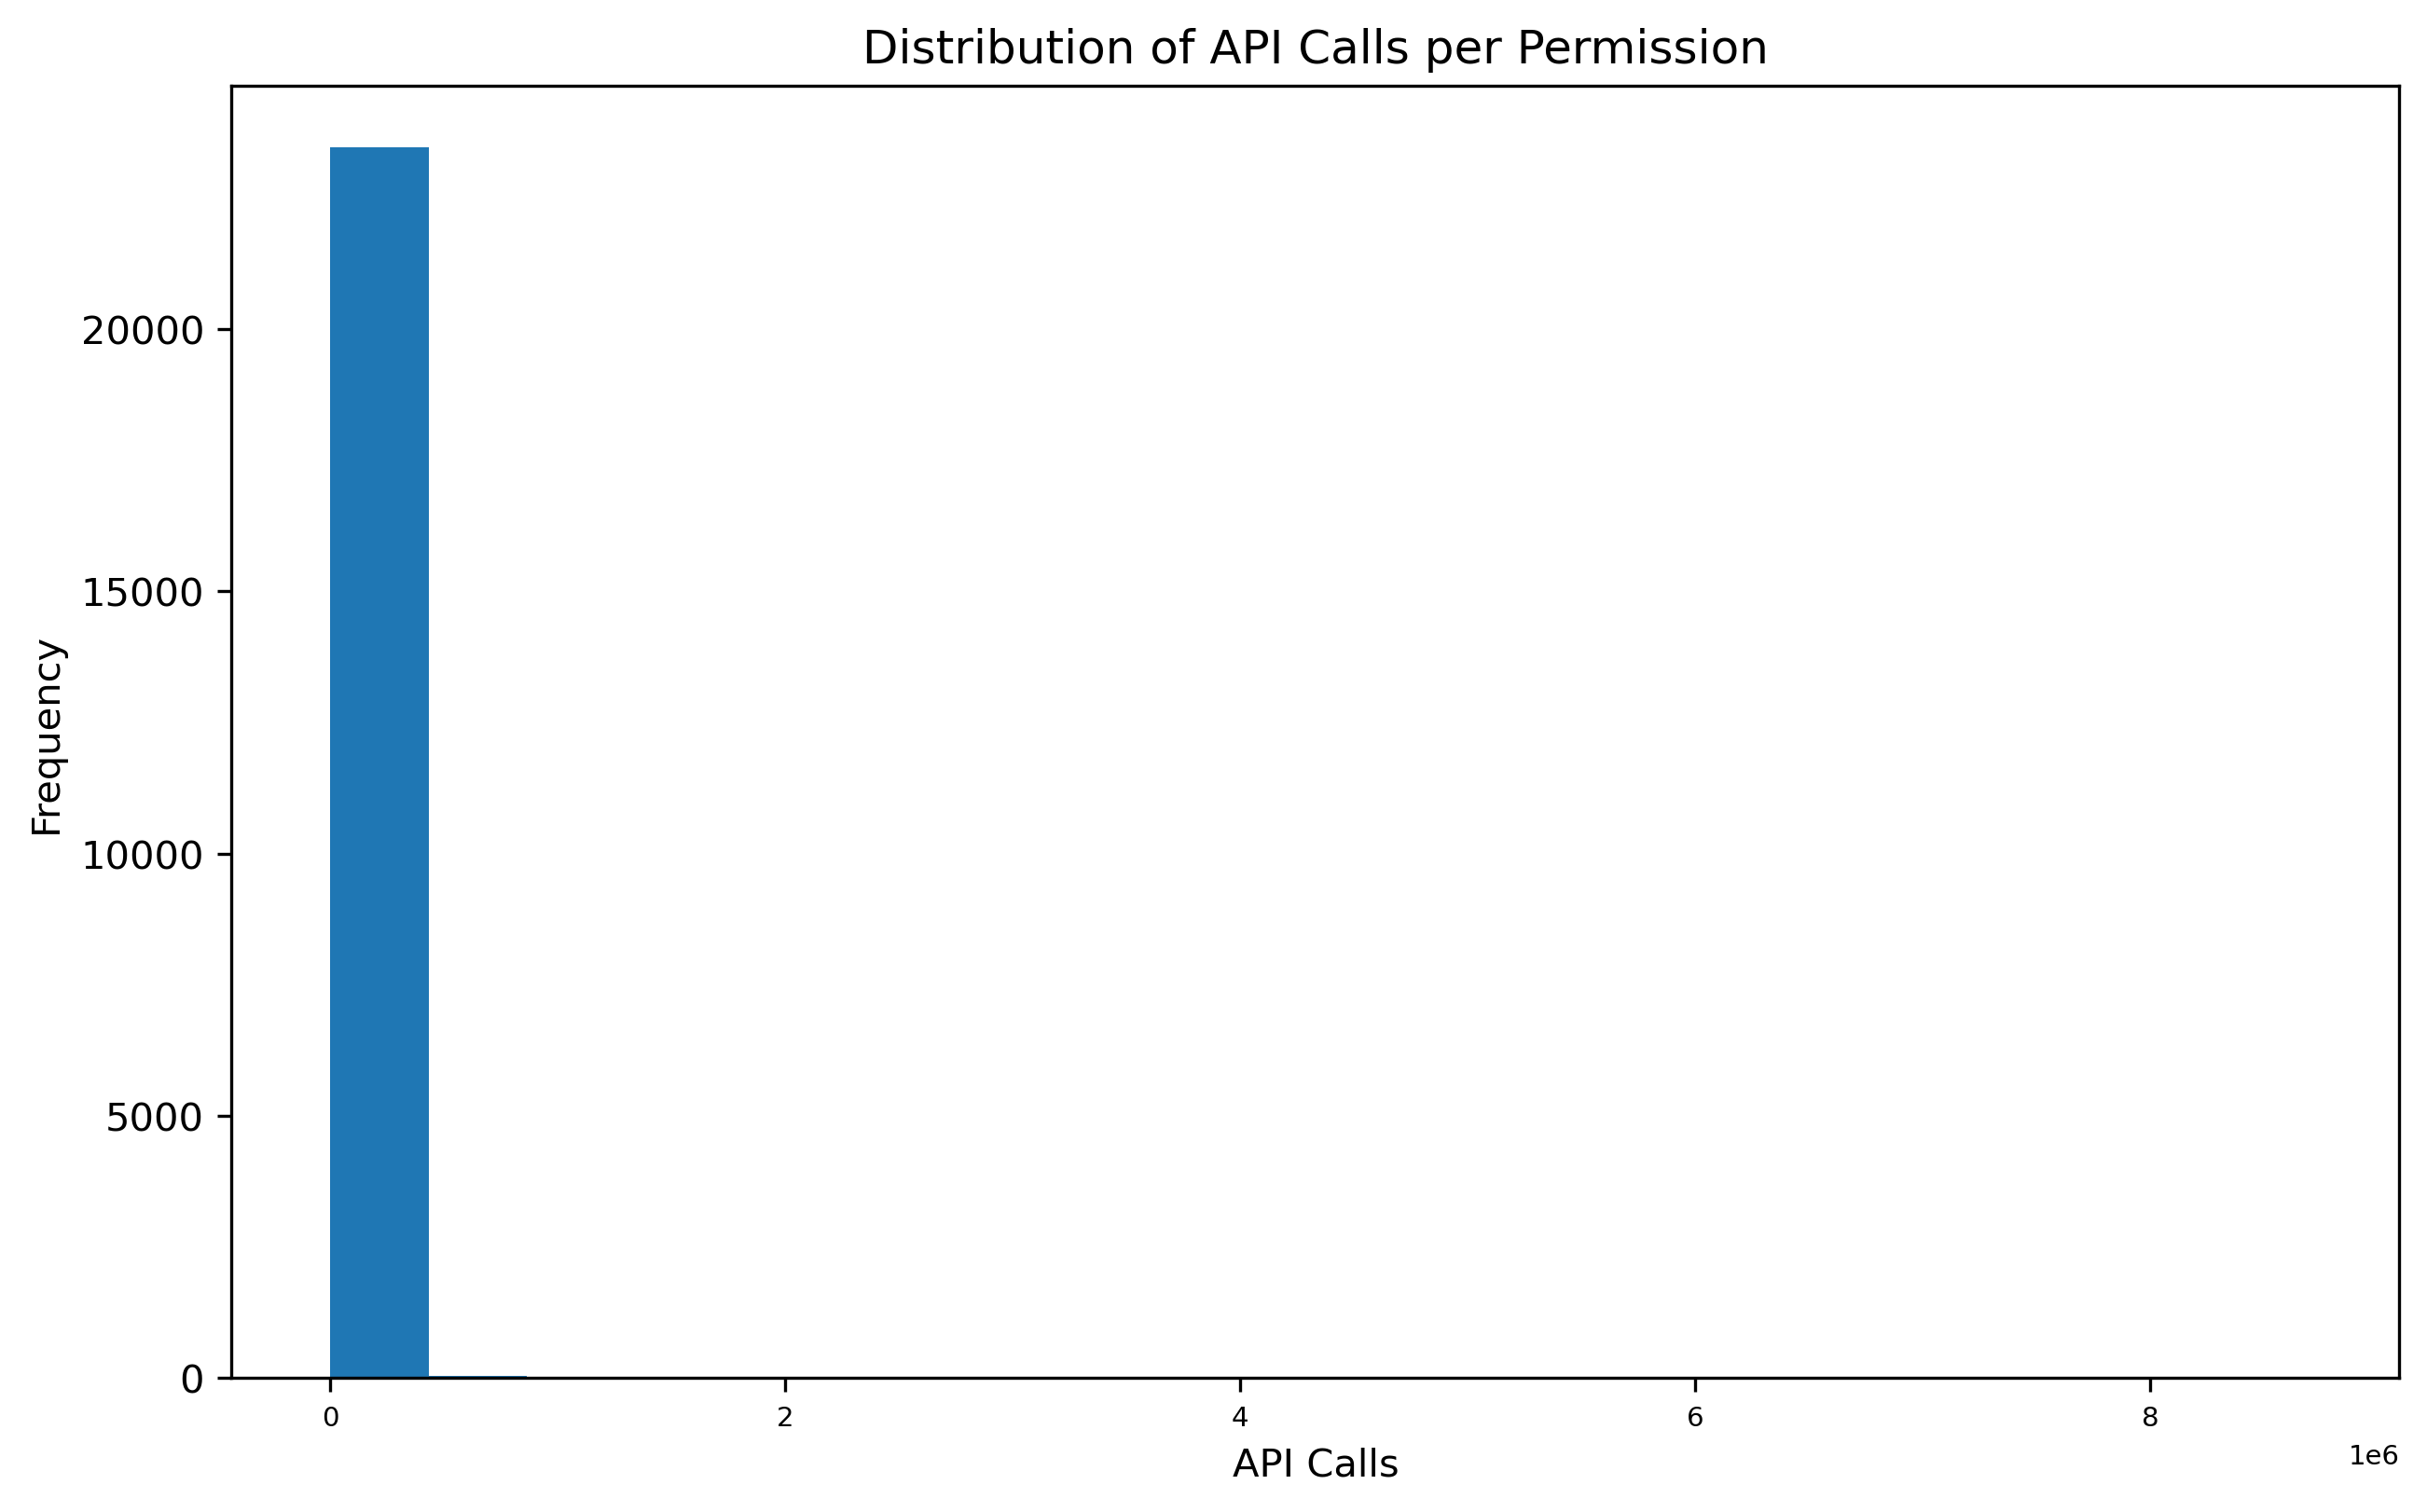

In [18]:
# Analyze the distribution of the number of API calls per permission:

# Group the data by permission and sum the number of API calls
api_calls = data1.groupby('Description')['Number of ratings'].sum()

# Plot the distribution of the number of API calls per permission
plt.figure(figsize=(10, 6))
plt.hist(api_calls, bins=20)
plt.title('Distribution of API Calls per Permission')
plt.xlabel('API Calls')
plt.ylabel('Frequency')
plt.show()

In [19]:
pd.set_option('display.max_columns', None)
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col,data[col].isna().sum())

Dangerous permissions count 204


In [20]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, len(data[col].unique()))

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 180 entries, Rating to Price_numeric
dtypes: float64(3), int64(177)
memory usage: 41.2 MB


In [22]:
data.describe()

Rating  Number of ratings         Price  \
count  29999.000000       2.999900e+04  29999.000000   
mean       3.537215       6.852608e+03      0.625707   
std        1.424685       4.586899e+04      3.222620   
min        0.000000       0.000000e+00      0.000000   
25%        3.300000       4.000000e+00      0.000000   
50%        4.000000       4.600000e+01      0.000000   
75%        4.400000       7.160000e+02      0.000000   
max        5.000000       1.908590e+06    158.070000   

       Dangerous permissions count  Safe permissions count  \
count                 29795.000000            29999.000000   
mean                      3.111160                1.353978   
std                       3.052602                1.523491   
min                       0.000000                0.000000   
25%                       1.000000                0.000000   
50%                       2.000000                1.000000   
75%                       4.000000                2.000000   
max                      30.000000               16.000000   

       Default : Access DRM content. (S)  \
count                       29999.000000   
mean                            0.000300   
std                             0.017318   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       Default : Access Email provider data (S)  \
count                              29999.000000   
mean                                   0.000700   
std                                    0.026449   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       Default : Access all system downloads (S)  \
count                                    29999.0   
mean                                         0.0   
std                                          0.0   
min                                          0.0   
25%                                          0.0   
50%                                          0.0   
75%                                          0.0   
max                                          0.0   

       Default : Access download manager. (S)  \
count                            29999.000000   
mean                                 0.000400   
std                                  0.019997   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Default : Advanced download manager functions. (S)  \
count                                       29999.000000    
mean                                            0.000033    
std                                             0.005774    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       Default : Audio File Access (S)  Default : Install DRM content. (S)  \
count                     29999.000000                        29999.000000   
mean                          0.000167                            0.000667   
std                           0.012909                            0.025812   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.000000                            0.000000   
75%                           0.000000                            0.000000   
max    

In [23]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = round(numeric_data.corr(), 2)
print(corr_matrix)

                                                    Rating  Number of ratings  \
Rating                                                1.00               0.09   
Number of ratings                                     0.09               1.00   
Price                                                -0.14              -0.03   
Dangerous permissions count                           0.10               0.17   
Safe permissions count                                0.14               0.19   
...                                                    ...                ...   
Your personal information : write Browser's his...    0.03               0.01   
Your personal information : write contact data (D)    0.03               0.11   
Your personal information : write to user defin...    0.02               0.05   
Class                                                -0.22              -0.04   
Price_numeric                                          NaN                NaN   

                           

In [45]:
dropper = []
for col in data1.columns[10:]:
    if (data1[col].value_counts()[0] == 29999 or data1[col].value_counts()[1] < 1500):
        dropper.append(col)
print(len(dropper))

158


In [46]:
def preprocess_inputs(data1,lst):
    data1 = data1.copy()
    data1 = data1.drop_duplicates()
    data1 = data1.drop(['App','Package','Description','Related apps'],axis=1)
    for i in lst:
        data1 = data1.drop(i,axis=1)
    data1 = data1.dropna(axis=0)
    encoder = LabelEncoder()
    data1['Category'] = encoder.fit_transform(data1['Category'])
    
    y = data1['Class']
    X = data1.drop('Class',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = preprocess_inputs(data1,lst=dropper)
X_train

Category    Rating  Number of ratings     Price  \
11025  0.135207  0.681694          -0.097652 -0.184891   
11355 -0.427665  0.681694          -0.124847 -0.184891   
24133 -0.315090  0.049269          -0.111225 -0.184891   
20754 -0.089942  0.681694           1.092117 -0.184891   
7587  -1.328258 -1.145310          -0.124058 -0.184891   
...         ...       ...                ...       ...   
29752 -0.877961 -0.021000          -0.114690 -0.184891   
8262   0.923226  0.049269          -0.124656 -0.184891   
20114 -1.328258  0.611424           0.252729  1.270872   
21347 -0.202516  0.189808          -0.124608 -0.184891   
14996  1.823820  0.119539          -0.124632 -0.184891   

       Dangerous permissions count  Safe permissions count  \
11025                     0.660573                0.464654   
11355                    -0.673154               -0.206627   
24133                     0.327141                0.464654   
20754                     2.994595                2.478496   
7587                     -0.673154               -0.877907   
...                            ...                     ...   
29752                     1.660868                1.807215   
8262                      2.327731               -0.206627   
20114                     0.994005                0.464654   
21347                    -0.339722               -0.877907   
14996                    -1.006586               -0.877907   

       Hardware controls : control vibrator (S)  \
11025                                 -0.528334   
11355                                 -0.528334   
24133                                 -0.528334   
20754                                 -0.528334   
7587                                  -0.528334   
...                                         ...   
29752                                  1.892741   
8262                                  -0.528334   
20114                                 -0.528334   
21347                                 -0.528334   
14996                                 -0.528334   

       Hardware controls : take pictures and videos (D)  \
11025                                          3.688924   
11355                                         -0.271082   
24133                                         -0.271082   
20754                                         -0.271082   
7587                                          -0.271082   
...                                                 ...   
29752                                          3.688924   
8262                                           3.688924   
20114                                         -0.271082   
21347                                         -0.271082   
14996                                         -0.271082   

       Network communication : full Internet access (D)  \
11025                                          0.483373   
11355                                          0.483373   
24133                                          0.483373   
20754                                          0.483373   
7587                                           0.483373   
...                                                 ...   
29752                                          0.483373   
8262                                           0.483373   
20114                                          0.483373   
21347                                          0.483373   
14996                                         -2.068795   

       Network communication : view Wi-Fi state (S)  \
11025                                     -0.393025   
11355                                     -0.393025   
24133                                      2.544368   
20754                                     -0.393025   
7587                                      -0.393025   
...                                             ...   
29752                                      2.544368   
8262                                      -0.393025   
20114                                  

In [48]:
smote = SMOTE(random_state=23)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [61]:
from sklearn.metrics import classification_report

# Dictionary to store classification reports
classification_reports = {}

# Loop through models and train
for name, model in models.items():
    model = model.fit(X_train_smote, y_train_smote)
    print(name + " trained")
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Generate classification report and store it
    report = classification_report(y_test, y_pred)
    classification_reports[name] = report

# Print classification reports
for name, report in classification_reports.items():
    print(f"\nClassification Report for {name}:")
    print(report)


  Logistic Regression trained


C:\Users\KARTHIK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KARTHIK\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained

Classification Report for   Logistic Regression:
              precision    recall  f1-score   support

           0       0.54      0.83      0.65      2719
           1       0.88      0.65      0.74      5414

    accuracy                           0.71      8133
   macro avg       0.71      0.74      0.70      8133
weighted avg       0.77      0.71      0.71      8133


Classification Report for            Linear SVM:
              precision    recall  f1-score   support

           0       0.54      0.84      0.66      2719
           1       0.89      0.64      0.74      5414

    accuracy                           0.71      8133
   macro avg       0.71      0.74      0.70      8133
weighted avg       0.77      0.71      0.71      8133


Classification Report for         X

In [62]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

  Logistic Regression: 70.59%
           Linear SVM: 70.64%
        XGBClassifier: 80.70%
    Gradient Boosting: 80.22%
        Decision Tree: 74.72%
        Random Forest: 77.66%
 KNeighborsClassifier: 71.45%
   Bagging Classifier: 77.76%


In [63]:
import tensorflow as tf

In [64]:
inputs = tf.keras.Input(shape=(X_train_smote.shape[1],))

x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["binary_accuracy"])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ input_layer_1            │ (None, 21)        │         0 │
│ (InputLayer)             │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_4 (Dense)          │ (None, 128)       │     2,816 │
├──────────────────────────┼───────────────────┼───────────┤
│ batch_normalization_1    │ (None, 128)       │       512 │
│ (BatchNormalization)     │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_5 (Dense)          │ (None, 64)        │     8,256 │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_2 (Dropout)      │ (None, 64)        │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_6 (Dense)          │ (None, 32)        │     2,080 │
├──────────────────────────┼───────────────────┼───────────┤
│ dropout_3 (Dropout)      │ (None, 32)        │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_7 (Dense)          │ (None, 1)         │        33 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,441 (52.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [65]:
epochs=10
history = model.fit(
  X_train_smote,
  y_train_smote,
  validation_split=0.2,
  epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=3,
            restore_best_weights=True
            )
    ]
)

Epoch 1/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.6256 - loss: 0.6414 - val_binary_accuracy: 0.6442 - val_loss: 0.6983
Epoch 2/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6893 - loss: 0.5361 - val_binary_accuracy: 0.8191 - val_loss: 0.6553
Epoch 3/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7170 - loss: 0.4976 - val_binary_accuracy: 0.8928 - val_loss: 0.5976
Epoch 4/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7264 - loss: 0.4907 - val_binary_accuracy: 0.8625 - val_loss: 0.6207
Epoch 5/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7333 - loss: 0.4789 - val_binary_accuracy: 0.8809 - val_loss: 0.6020
Epoch 6/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7409 - loss: 0.4712 - val_binary_accuracy: 0.8984 - val_loss: 0.5793
Epoch 7/10
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7391 - loss: 0.4664 - val_binary_accuracy: 0.8970 - val_loss: 0.5853
Epoch 

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'My test loss is {loss*100:.2f}% and test accuracy is {accuracy*100:.2f}%')

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - binary_accuracy: 0.7248 - loss: 0.4637
My test loss is 45.52% and test accuracy is 73.21%


In [66]:
from prettytable import PrettyTable

# Define the table
table = PrettyTable()

# Define the columns
table.field_names = ["Epoch", "binary_accuracy", "loss", "val_binary_accuracy", "val_loss"]

# Add data rows
table.add_row([1, 0.6256, 0.6414, 0.6442, 0.6983])
table.add_row([2, 0.6893, 0.5361, 0.8191, 0.6553])
table.add_row([3, 0.7170, 0.4976, 0.8928, 0.5976])
table.add_row([4, 0.7264, 0.4907, 0.8625, 0.6207])
table.add_row([5, 0.7333, 0.4789, 0.8809, 0.6020])
table.add_row([6, 0.7409, 0.4712, 0.8984, 0.5793])
table.add_row([7, 0.7391, 0.4664, 0.8970, 0.5853])
table.add_row([8, 0.7440, 0.4640, 0.8526, 0.6304])
table.add_row([9, 0.7428, 0.4625, 0.9202, 0.5656])
table.add_row([10, 0.7504, 0.4628, 0.8770, 0.6005])

# Print the table
print(table)

+-------+-----------------+--------+---------------------+----------+
| Epoch | binary_accuracy |  loss  | val_binary_accuracy | val_loss |
+-------+-----------------+--------+---------------------+----------+
|   1   |      0.6256     | 0.6414 |        0.6442       |  0.6983  |
|   2   |      0.6893     | 0.5361 |        0.8191       |  0.6553  |
|   3   |      0.717      | 0.4976 |        0.8928       |  0.5976  |
|   4   |      0.7264     | 0.4907 |        0.8625       |  0.6207  |
|   5   |      0.7333     | 0.4789 |        0.8809       |  0.602   |
|   6   |      0.7409     | 0.4712 |        0.8984       |  0.5793  |
|   7   |      0.7391     | 0.4664 |        0.897        |  0.5853  |
|   8   |      0.744      | 0.464  |        0.8526       |  0.6304  |
|   9   |      0.7428     | 0.4625 |        0.9202       |  0.5656  |
|   10  |      0.7504     | 0.4628 |        0.877        |  0.6005  |
+-------+-----------------+--------+---------------------+----------+


In [67]:
from prettytable import PrettyTable

# Define the table
table = PrettyTable()

# Define the columns
table.field_names = ["Model", "Accuracy"]

# Add data rows
table.add_row(["Logistic Regression", "70.59%"])
table.add_row(["Linear SVM", "70.64%"])
table.add_row(["XGBClassifier", "80.70%"])
table.add_row(["Gradient Boosting", "80.22%"])
table.add_row(["Decision Tree", "74.72%"])
table.add_row(["Random Forest", "77.66%"])
table.add_row(["KNeighborsClassifier", "71.45%"])
table.add_row(["Bagging Classifier", "77.76%"])

# Print the table
print(table)

+----------------------+----------+
|        Model         | Accuracy |
+----------------------+----------+
| Logistic Regression  |  70.59%  |
|      Linear SVM      |  70.64%  |
|    XGBClassifier     |  80.70%  |
|  Gradient Boosting   |  80.22%  |
|    Decision Tree     |  74.72%  |
|    Random Forest     |  77.66%  |
| KNeighborsClassifier |  71.45%  |
|  Bagging Classifier  |  77.76%  |
+----------------------+----------+
